In [1]:
# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro
import matplotlib

## 예측
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y~X1+X2+...)
import statsmodels.formula.api as smf
# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
# Ridge, Lasso, ElasticNet 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tress
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz
# MSE 계산
from sklearn.metrics import mean_squared_error
# MAE 계산
from sklearn.metrics import mean_absolute_error
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# Scale 변환: 평균, 표준편차 기준
from sklearn.preprocessing import StandardScaler

# 주성분 분석
from sklearn.decomposition import PCA
# 날짜 데이터 생성
from datetime import datetime
# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ARIMA
from statsmodels.tsa.arima_model import ARIMA


## 분류
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_curve, auc, recall_score


## 음수 표시
#plt.rc('axes', unicode_minus=False)
## 맑은 고딕 적용
#plt.rc("font", family="Malgun Gothic")

%matplotlib inline
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

from sklearn.linear_model import LogisticRegression
import itertools


## 데이터 불러오기

In [2]:
Card_data = pd.read_csv("./Card_data.csv", encoding = 'cp949')
Card_spending = pd.read_csv("./Card_spending.csv", encoding = 'cp949')
Telemarketing = pd.read_csv("./Telemarket.csv", encoding = 'cp949')

In [3]:
# Card_data+Card_spending
Card_spending.rename(columns = {"사용카드": "Card_ID"}, inplace = True)
merge_data1=pd.merge(Card_data, Card_spending)

In [4]:
# Card_data+Telemarket
Telemarketing.rename(columns = {"카드종류": "Card_ID"}, inplace = True)
merge_data2=pd.merge(Card_data, Telemarketing)

In [5]:
# 체크카드 / 신용카드 분류
check_card1=merge_data1[merge_data1["분류"]=="체크카드"]
credit_card1=merge_data1[merge_data1["분류"]=="신용카드"]

check_card2=merge_data2[merge_data2["분류"]=="체크카드"]
credit_card2=merge_data2[merge_data2["분류"]=="신용카드"]

## 탐색적 분석

#### [상관분석]

- Card_spending

In [6]:
# Card_spending 상관분석
Card_spending.corr()

,사용일자,연령,사용횟수,사용금액,Card_ID,1회 사용금액
사용일자,1.000000,-0.001175,-0.006336,0.000017,0.000135,-0.001351
연령,-0.001175,1.000000,-0.114319,-0.040280,0.112637,0.006746
사용횟수,-0.006336,-0.114319,1.000000,0.766207,0.060545,-0.020179
사용금액,0.000017,-0.040280,0.766207,1.000000,0.008929,0.141378
Card_ID,0.000135,0.112637,0.060545,0.008929,1.000000,0.004907
1회 사용금액,-0.001351,0.006746,-0.020179,0.141378,0.004907,1.000000


<AxesSubplot:title={'center':'Correlation of Features'}>

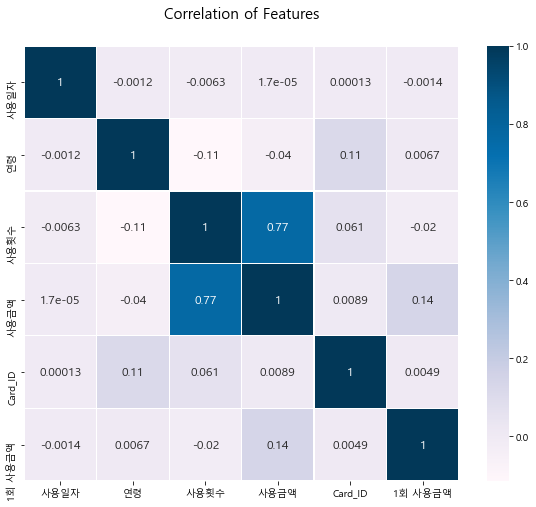

In [7]:
# 위의 표가 보기 어렵다면 heatmap을 그려본다.
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(Card_spending.corr(), 
            linewidths = 0.1, 
            vmax = 1.0, 
            square = True, 
            cmap = colormap, 
            linecolor = "white", 
            annot = True, 
            annot_kws = {"size" : 12})

- Telemarket

In [8]:
# Telemarket 상관분석
Telemarketing.corr()

,연령,통화시간,연락시도횟수,과거통화횟수,Card_ID
연령,1.000000,-0.003170,0.001604,0.024534,-0.006543
통화시간,-0.003170,1.000000,-0.017052,0.023212,-0.009170
연락시도횟수,0.001604,-0.017052,1.000000,-0.074269,0.019550
과거통화횟수,0.024534,0.023212,-0.074269,1.000000,0.000234
Card_ID,-0.006543,-0.009170,0.019550,0.000234,1.000000


<AxesSubplot:title={'center':'Correlation of Features'}>

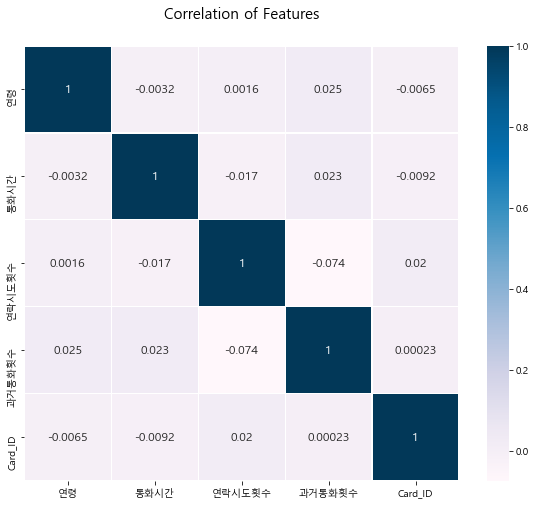

In [9]:
# 위의 표가 보기 어렵다면 heatmap을 그려본다.
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(Telemarketing.corr(), 
            linewidths = 0.1, 
            vmax = 1.0, 
            square = True, 
            cmap = colormap, 
            linecolor = "white", 
            annot = True, 
            annot_kws = {"size" : 12})

#### [막대그래프]

- 연령대의 신용카드 사용 비율

,연령대별 신용카드 사용 비율
20대,0.138365
30대,0.198200
40대,0.219540
50대,0.202563
60대,0.161244
70대,0.045668
80대,0.026197
90대,0.008210
100대,0.000014


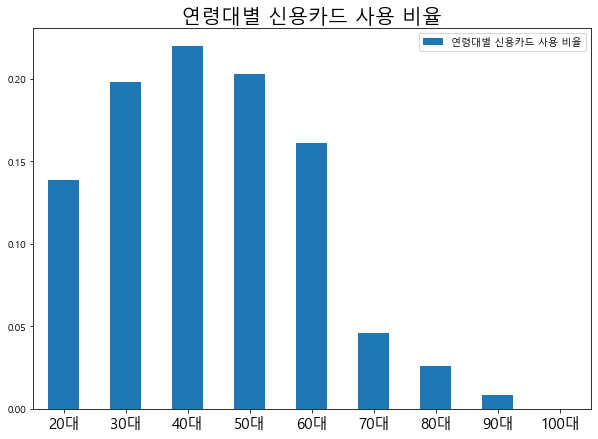

In [10]:
# 연령대의 신용카드 사용 비율
age_credit_card = credit_card1["연령대"].value_counts()
total_credit_card = credit_card1["연령대"].value_counts().sum()
pd.DataFrame(age_credit_card/total_credit_card).reindex(index = ["20대", "30대", "40대", "50대", "60대", "70대", "80대", "90대", "100대"]).rename({"연령대":"연령대별 신용카드 사용 비율"}, axis='columns').plot.bar(rot=0, figsize=(10, 7))
plt.title("연령대별 신용카드 사용 비율", fontsize=20)
plt.xticks(fontsize = 15)
pd.DataFrame(age_credit_card/total_credit_card).reindex(index = ["20대", "30대", "40대", "50대", "60대", "70대", "80대", "90대", "100대"]).rename({"연령대":"연령대별 신용카드 사용 비율"}, axis='columns')

,성공,실패,연령대별 계약 성공률,연령대의 계약 성공률
10대,34,41,0.453333,0.007486
20대,878,4471,0.164143,0.193307
30대,1669,14517,0.103114,0.367459
40대,808,9257,0.080278,0.177895
50대,683,5860,0.104386,0.150374
60대,250,457,0.353607,0.055042
70대,143,171,0.455414,0.031484
80대,72,68,0.514286,0.015852
90대,5,5,0.500000,0.001101


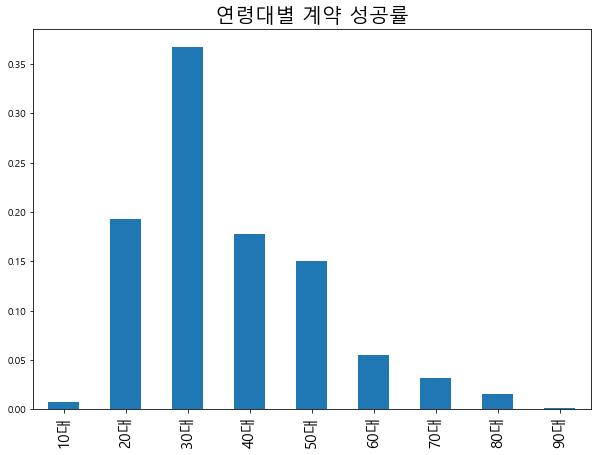

In [11]:
# 연령대별 계약 성공률
age_yes = Telemarketing[Telemarketing["계약여부"]=="yes"]["연령대"].value_counts()
age_no = Telemarketing[Telemarketing["계약여부"]=="no"]["연령대"].value_counts()
age_success = pd.DataFrame(age_yes/(age_yes+age_no))
age_df = pd.concat([age_yes, age_no, age_success], axis = 1)
age_df.columns = ["성공", "실패", "연령대별 계약 성공률"]
age_df["연령대의 계약 성공률"] = age_df["성공"]/age_df["성공"].sum()
age_df.sort_index()["연령대의 계약 성공률"].plot.bar(figsize = (10,7))
plt.title("연령대별 계약 성공률", fontsize = 20)
plt.xticks(fontsize = 15)
age_df.sort_index()

In [12]:
jongno = credit_card1[credit_card1["지역"]=="종로구"]
nowon = credit_card1[credit_card1["지역"]=="노원구"]

## 20대 중후반의 소비트렌드 분석

- 20대 중후반

In [13]:
tw_upper = credit_card1[(credit_card1["연령"] >= 23)&(credit_card1["연령"] <= 29)]
tw_upper.head()

,Card_ID,분류,혜택분야,카드명,후불교통,가족카드,현금기능,IC기능,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,1회 사용금액,연령대,요일
41760,87,신용카드,life,S카드 D-day,0,1,0,0,20180405,노원구,"상계3,4동","노원구 상계3,4동",의료기관,여성,25,13,42,3.0,20대,목
41774,87,신용카드,life,S카드 D-day,0,1,0,0,20180413,종로구,교남동,종로구 교남동,보건위생,여성,25,4,613,153.0,20대,금
41783,87,신용카드,life,S카드 D-day,0,1,0,0,20180417,종로구,"종로5,6가동","종로구 종로5,6가동",신변잡화,여성,25,9,88,10.0,20대,화
41786,87,신용카드,life,S카드 D-day,0,1,0,0,20180418,노원구,공릉2동,노원구 공릉2동,의료기관,남성,25,61,557,9.0,20대,수
41835,87,신용카드,life,S카드 D-day,0,1,0,0,20180512,노원구,"상계6,7동","노원구 상계6,7동",의료기관,여성,25,323,16541,51.0,20대,토


In [14]:
tw_upper["혜택분야"].value_counts()

comm              2389
shopping          1971
life              1465
travel            1459
public            1113
oil               1067
onlineShopping    1052
culture            654
food               412
finance            393
Name: 혜택분야, dtype: int64

- 이상치 처리

In [15]:
Q1_n = merge_data1["사용횟수"].quantile(.25)
Q2_n = merge_data1["사용횟수"].quantile(.5)
Q3_n = merge_data1["사용횟수"].quantile(.75)
Q4_n = merge_data1["사용횟수"].quantile(1)
IQR_n = Q3_n-Q1_n

Quartile_n_upper = Q3_n+(1.5*IQR_n)
Quartile_n_lower = Q3_n-(1.5*IQR_n)

In [16]:
merge_data1["사용횟수"] = np.where(merge_data1["사용횟수"] >= Quartile_n_upper, Quartile_n_upper, merge_data1["사용횟수"])
merge_data1["사용횟수"] = np.where(merge_data1["사용횟수"] <= Quartile_n_lower, Quartile_n_lower, merge_data1["사용횟수"])

In [17]:
Q1_m = Card_spending["사용금액"].quantile(.25)
Q2_m = Card_spending["사용금액"].quantile(.5)
Q3_m = Card_spending["사용금액"].quantile(.75)
Q4_m = Card_spending["사용금액"].quantile(1)
IQR_m = Q3_m - Q1_m

Quartile_m_upper = Q3_m + (1.5 * IQR_m)
Quartile_m_lower = Q3_m - (1.5 * IQR_m)

In [18]:
merge_data1["사용금액"] = np.where(merge_data1["사용금액"] >= Quartile_m_upper, Quartile_m_upper, merge_data1["사용금액"])
merge_data1["사용금액"] = np.where(merge_data1["사용금액"] <= Quartile_m_lower, Quartile_m_lower, merge_data1["사용금액"])

- 혜택분야와 사용금액은 연관성이 있을까?(ANOVA 분석)

In [19]:
# 혜택분야(10개)와 사용횟수 / 사용금액
field_category = {}

for i in tw_upper['혜택분야'].unique():
    field_category[i] = list(itertools.chain.from_iterable(tw_upper[tw_upper['혜택분야'] == i][['사용금액']].values))

In [20]:
benefit = pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in field_category.items() ]))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

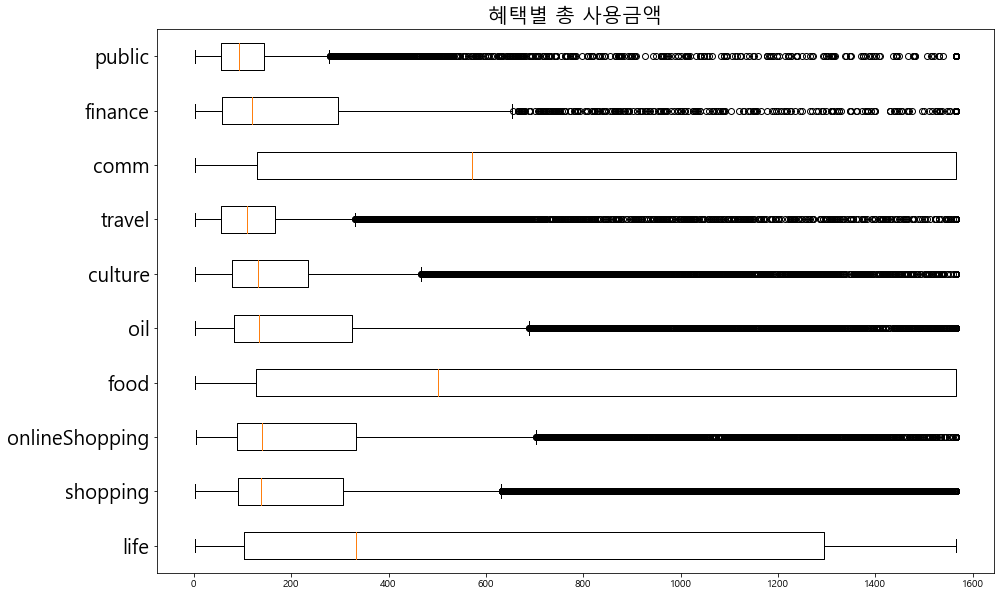

In [21]:
fig, ax = plt.subplots(figsize = (15, 10))
a = merge_data1[merge_data1["혜택분야"] == "life"]["사용금액"]
b = merge_data1[merge_data1["혜택분야"] == "shopping"]["사용금액"]
c = merge_data1[merge_data1["혜택분야"] == "onlineShopping"]["사용금액"]
d = merge_data1[merge_data1["혜택분야"] == "food"]["사용금액"]
e = merge_data1[merge_data1["혜택분야"] == "oil"]["사용금액"]
f = merge_data1[merge_data1["혜택분야"] == "culture"]["사용금액"]
g = merge_data1[merge_data1["혜택분야"] == "travel"]["사용금액"]
h = merge_data1[merge_data1["혜택분야"] == "comm"]["사용금액"]
i = merge_data1[merge_data1["혜택분야"] == "finance"]["사용금액"]
j = merge_data1[merge_data1["혜택분야"] == "public"]["사용금액"]
ax.boxplot([a, b, c, d, e, f, g, h, i, j], labels = ['life','shopping', 'onlineShopping', 'food', 'oil', 'culture', 'travel', 'comm', 'finance', 'public'], vert = False)
ax.set_title("혜택별 총 사용금액", fontsize = 20)
plt.yticks(fontsize = 20)

Text(0.5, 1.0, '연령대별 신용카드 총 사용금액')

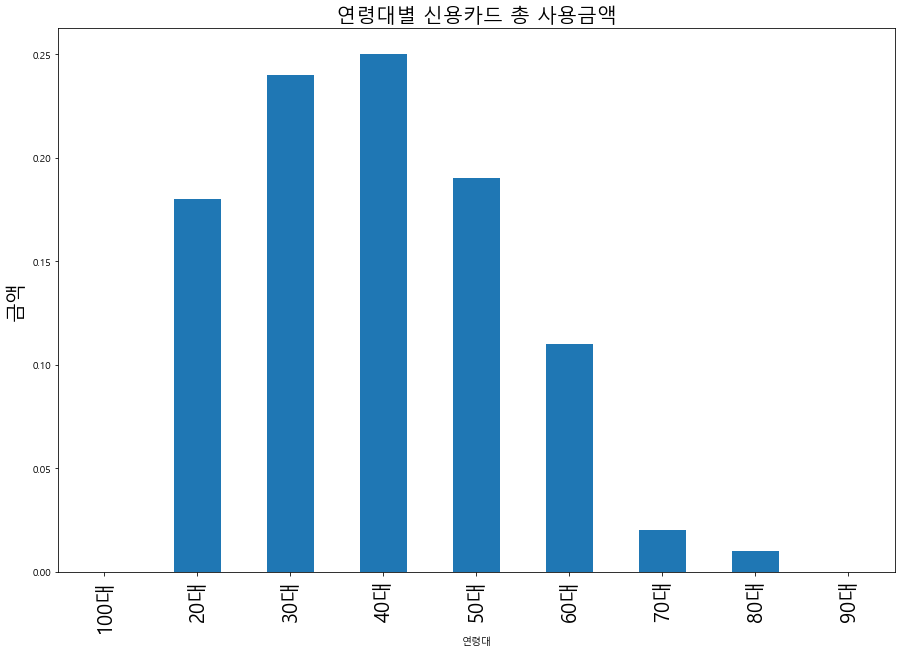

In [22]:
round(credit_card1.groupby("연령대").sum()["사용횟수"]/(credit_card1.groupby("연령대").sum()["사용횟수"].sum()),2).plot.bar(figsize = (15, 10))
plt.xticks(fontsize = 20)
plt.ylabel("금액", fontsize = 20)
plt.title("연령대별 신용카드 총 사용금액", fontsize = 20)

In [23]:
credit_card1.groupby("연령대").sum()["사용금액"]

연령대
100대         117
20대     23884150
30대     56690480
40대     68014033
50대     54358801
60대     34774074
70대       785540
80대       460157
90대       149526
Name: 사용금액, dtype: int64

In [24]:
(credit_card1.groupby("연령대").sum()["사용금액"].sum())

239116878

Text(0.5, 1.0, '혜택분야별 사용금액')

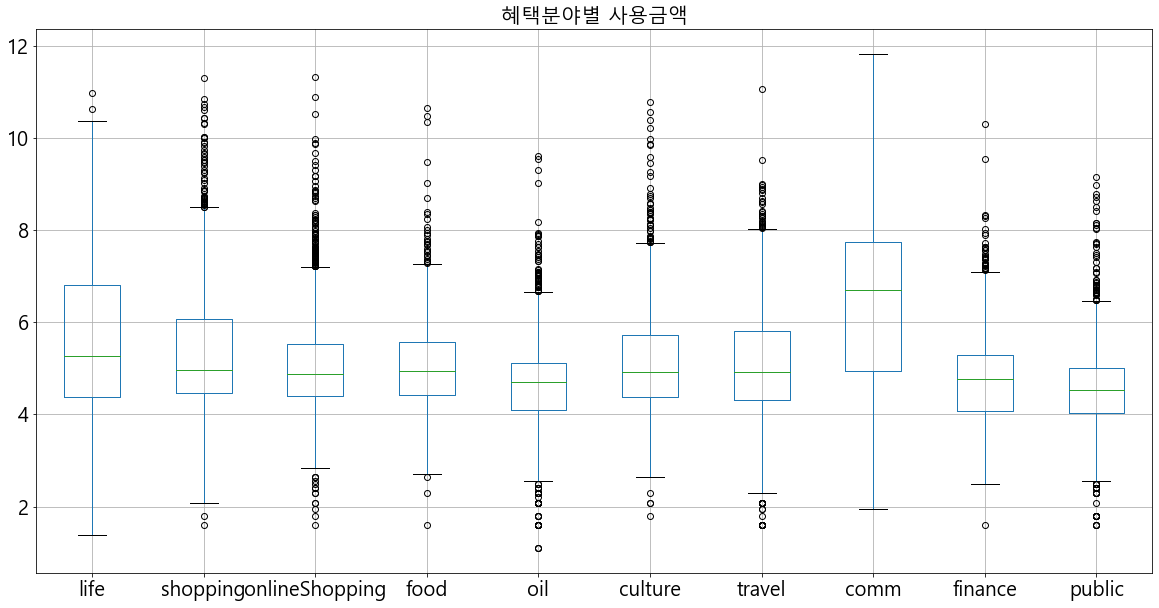

In [25]:
np.log1p(benefit).boxplot(figsize = (20, 10), fontsize = 20)
plt.title("혜택분야별 사용금액", fontsize = 20)

<AxesSubplot:xlabel='혜택분야', ylabel='사용금액'>

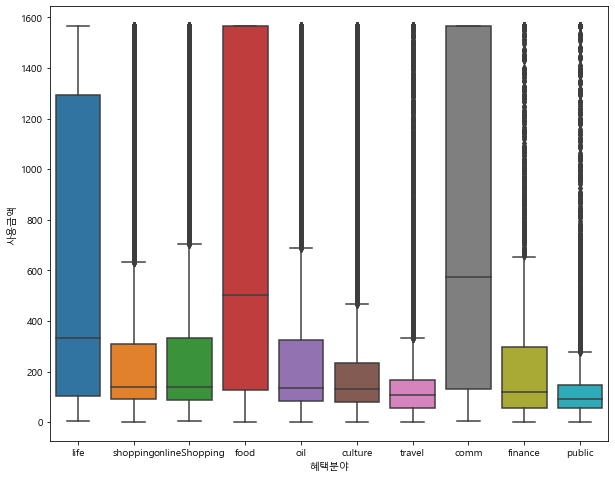

In [26]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "혜택분야", y = "사용금액", data = merge_data1)

In [27]:
# ANOVA 분석
f_result=stats.f_oneway(field_category['life'], field_category['shopping'], field_category['onlineShopping'], field_category['food'], \
                        field_category['oil'], field_category['culture'], field_category['travel'], field_category['comm'], field_category['finance'], field_category['public'])

f,p=f_result.statistic.round(3), f_result.pvalue.round(3)
print("[One-way]")
print("F 통계랑:{}".format(f))
print("p-value:{}".format(p))

[One-way]
F 통계랑:56.807
p-value:0.0


- 혜택분야와 사용횟수는 연관성이 있을까?(ANOVA 분석)

In [28]:
# 혜택분야(10개)와 사용횟수 / 사용금액
field_category = {}

for i in tw_upper['혜택분야'].unique():
    field_category[i] = list(itertools.chain.from_iterable(tw_upper[tw_upper['혜택분야'] == i][['사용횟수']].values))

In [29]:
benefit = pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in field_category.items() ]))

Text(0.5, 1.0, '혜택분야별 사용횟수')

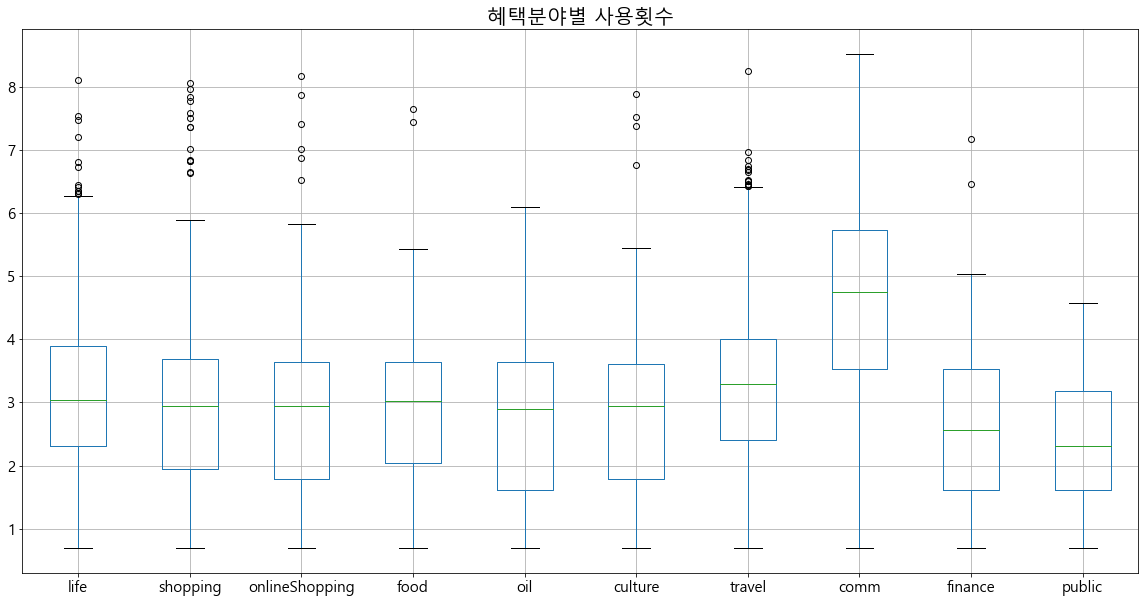

In [30]:
np.log1p(benefit).boxplot(figsize=(20, 10), fontsize=15)
plt.title("혜택분야별 사용횟수", fontsize=20)

In [31]:
# ANOVA 분석
f_result = stats.f_oneway(field_category['life'], field_category['shopping'], field_category['onlineShopping'], field_category['food'], \
                        field_category['oil'], field_category['culture'], field_category['travel'], field_category['comm'], field_category['finance'], field_category['public'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)
print("[One-way]")
print("F 통계랑:{}".format(f))
print("p-value:{}".format(p))

[One-way]
F 통계랑:218.567
p-value:0.0


- 20대 중후반이 사용하는 혜택분야 비율

,카드사용 비율
혜택분야,
comm,0.659734
culture,0.021195
finance,0.009198
food,0.013193
life,0.064852
oil,0.025623
onlineShopping,0.032854
public,0.015729
shopping,0.066974


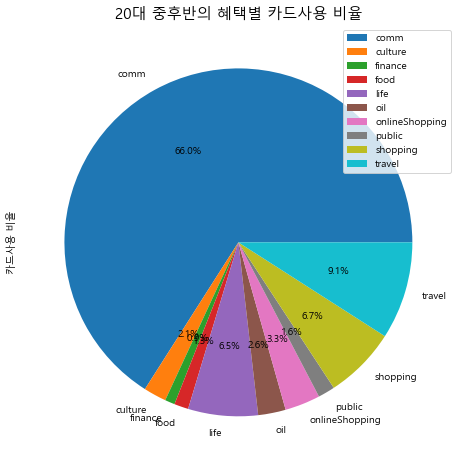

In [32]:
df_benefit_pro = pd.DataFrame(tw_upper.groupby("혜택분야").sum()['사용횟수']/(tw_upper.groupby("혜택분야").sum()['사용횟수'].sum()))
df_benefit_pro.rename(columns = {"사용횟수":"카드사용 비율"}).plot.pie(y = "카드사용 비율", autopct = "%.1f%%", figsize = (8,8), fontsize = 10)
plt.title("20대 중후반의 혜택별 카드사용 비율", fontsize = 15)
df_benefit_pro.rename(columns = {"사용횟수":"카드사용 비율"})


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'comm'),
  Text(1, 0, 'culture'),
  Text(2, 0, 'finance'),
  Text(3, 0, 'food'),
  Text(4, 0, 'life'),
  Text(5, 0, 'oil'),
  Text(6, 0, 'onlineShopping'),
  Text(7, 0, 'public'),
  Text(8, 0, 'shopping'),
  Text(9, 0, 'travel')])

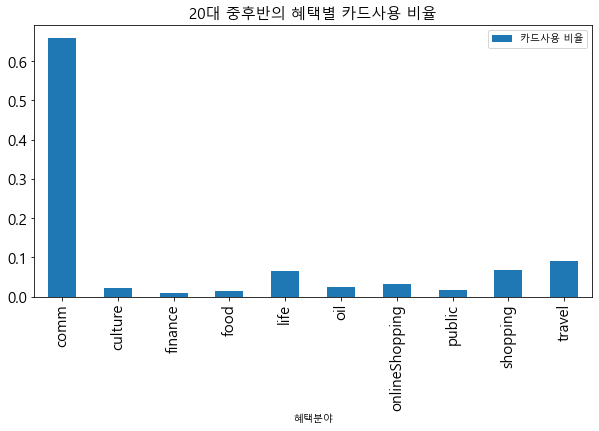

In [33]:
df_benefit_pro.rename(columns = {"사용횟수":"카드사용 비율"}).plot.bar(figsize = (10, 5), fontsize = 15)
plt.title("20대 중후반의 혜택별 카드사용 비율", fontsize = 15)
plt.xticks(fontsize = 15)

In [34]:
tw_upper["혜택분야"].value_counts()/(tw_upper["혜택분야"].value_counts()).sum()

comm              0.199499
shopping          0.164593
life              0.122338
travel            0.121837
public            0.092944
oil               0.089102
onlineShopping    0.087850
culture           0.054614
food              0.034405
finance           0.032818
Name: 혜택분야, dtype: float64

- 연령별 자동차 판매와 연령대와 연관성이 있는가?

<AxesSubplot:xlabel='주소'>

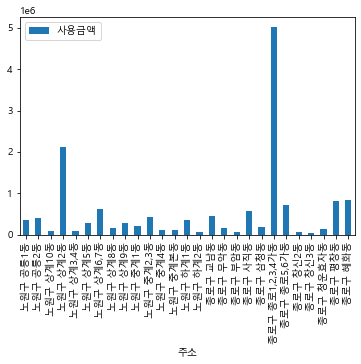

In [35]:
tw_upper.groupby("주소").sum()[["사용금액"]].plot.bar()

## 텔레마케팅 성공률 향상요인

In [36]:
credit_card1.groupby(["주소", "연령대"]).sum()[["사용금액", "사용횟수"]]

사용금액    사용횟수
주소       연령대                 
노원구 공릉1동 20대   599094   73594
         30대  2037848  114279
         40대  2614352  114174
         50대  2219582   93264
         60대  1509994   58502
...               ...     ...
종로구 혜화동  50대  1387038   89181
         60대   793199   38780
         70대    34230    8402
         80대    15586    3998
         90대     6185    1578

[218 rows x 2 columns]

Text(0.5, 1.0, '지역 전체')

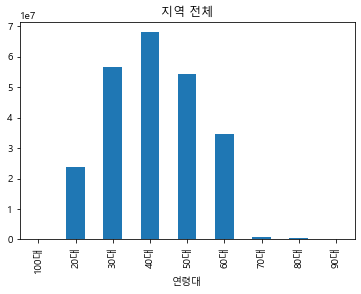

In [37]:
credit_card1.groupby("연령대").sum()["사용금액"].plot.bar()
plt.title("지역 전체")

Text(0.5, 1.0, '종로구')

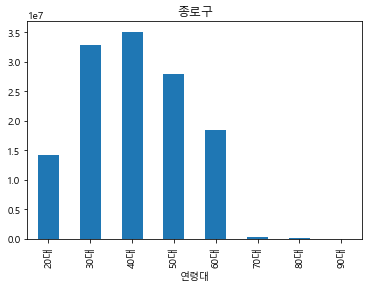

In [38]:
credit_card1[credit_card1["지역"]=="종로구"].groupby("연령대").sum()["사용금액"].plot.bar()
plt.title("종로구")

Text(0.5, 1.0, '노원구')

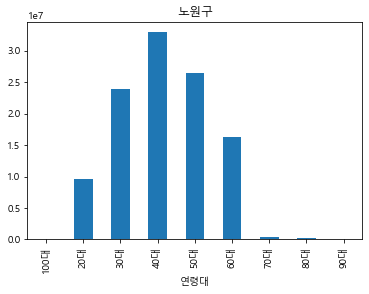

In [39]:
credit_card1[credit_card1["지역"]=="노원구"].groupby("연령대").sum()["사용금액"].plot.bar()
plt.title("노원구")

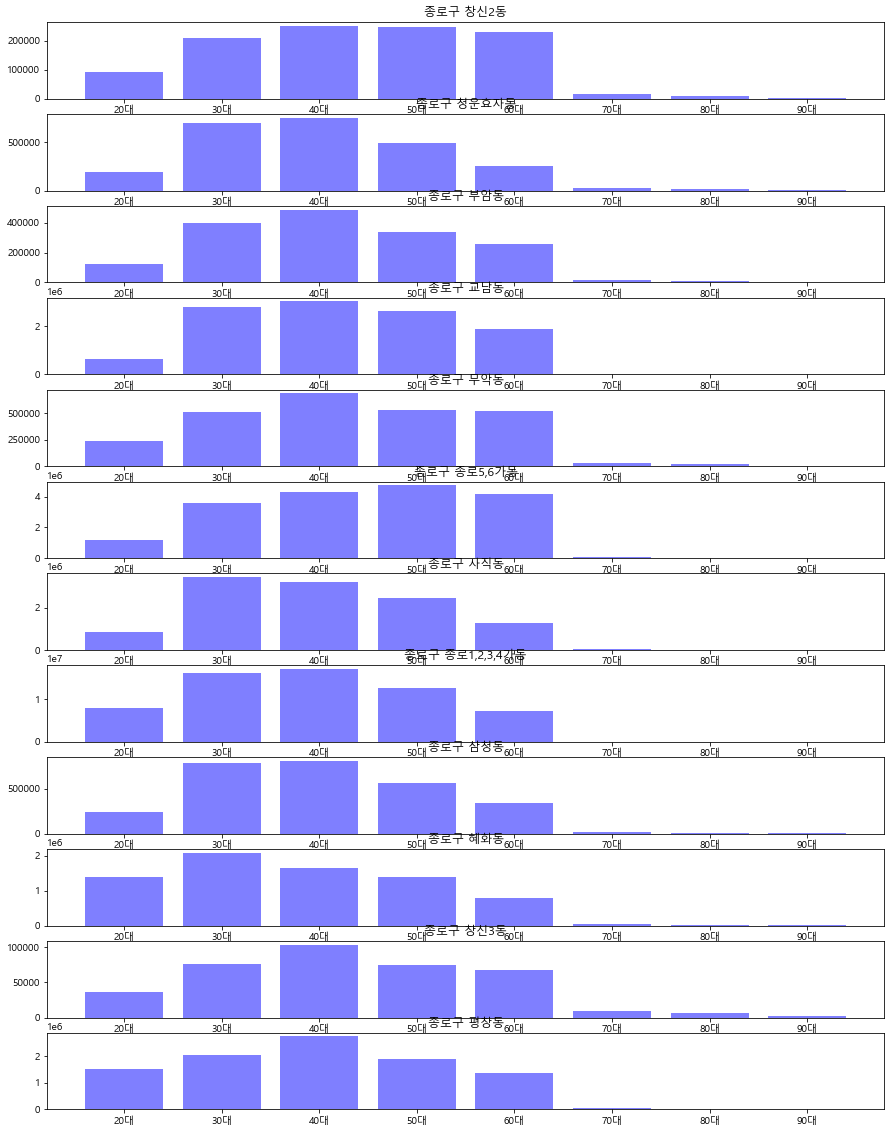

In [40]:
fig=plt.subplots(nrows=12, ncols=1, figsize=(15, 20))
plt.tight_layout(w_pad=5, h_pad=20)

index=1
for i in credit_card1[(credit_card1["지역"]=="종로구")]["주소"].unique():
    df=credit_card1[(credit_card1["주소"]==i)].groupby("연령대").sum()["사용금액"]
    plt.subplot(12, 1, index)
    plt.bar(df.index, df.values, color='blue', alpha=0.5)
    plt.title(i)
    index+=1

Text(0.5, 1.0, '종로구')

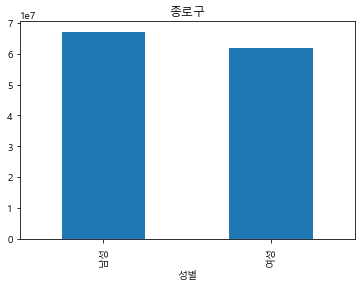

In [41]:
credit_card1[credit_card1["지역"]=="종로구"].groupby("성별").sum()["사용금액"].plot.bar()
plt.title("종로구")

Text(0.5, 1.0, '노원구')

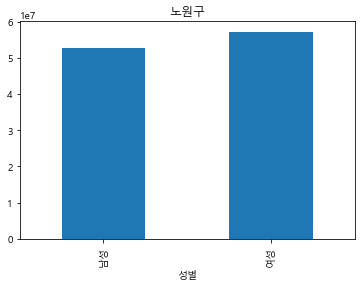

In [42]:
credit_card1[credit_card1["지역"]=="노원구"].groupby("성별").sum()["사용금액"].plot.bar()
plt.title("노원구")

In [43]:
credit_card1.groupby(["지역", "소비처업종"]).sum()["사용금액"]

지역   소비처업종
노원구  가구         331173
     가전        1425295
     광학제품       242800
     레저업소       761683
     문화취미       769756
     보건위생      5249575
     사무통신       192977
     서적문구      2384672
     수리서비스      435166
     신변잡화       860878
     연료판매      4662026
     요식업소     25195922
     유통업      43117321
     음료식품       127722
     의료기관     19937013
     의복        2264362
     자동차정비     1356630
     자동차판매       87300
     전기          85086
     주방용품       204135
     직물         219919
종로구  가구          29775
     가전        1357527
     광학제품       269215
     레저업소       738815
     문화취미       970605
     보건위생      4065199
     사무통신       417152
     서적문구     12474232
     수리서비스      444892
     신변잡화      3716978
     연료판매      2606538
     요식업소     37124948
     유통업      43078218
     음료식품       115744
     의료기관     14424294
     의복        4183319
     자동차정비     1540600
     자동차판매      114637
     전기          70260
     주방용품       116849
     직물        1345670
Name: 사용금액, dtype: int6

<Figure size 2160x14400 with 0 Axes>

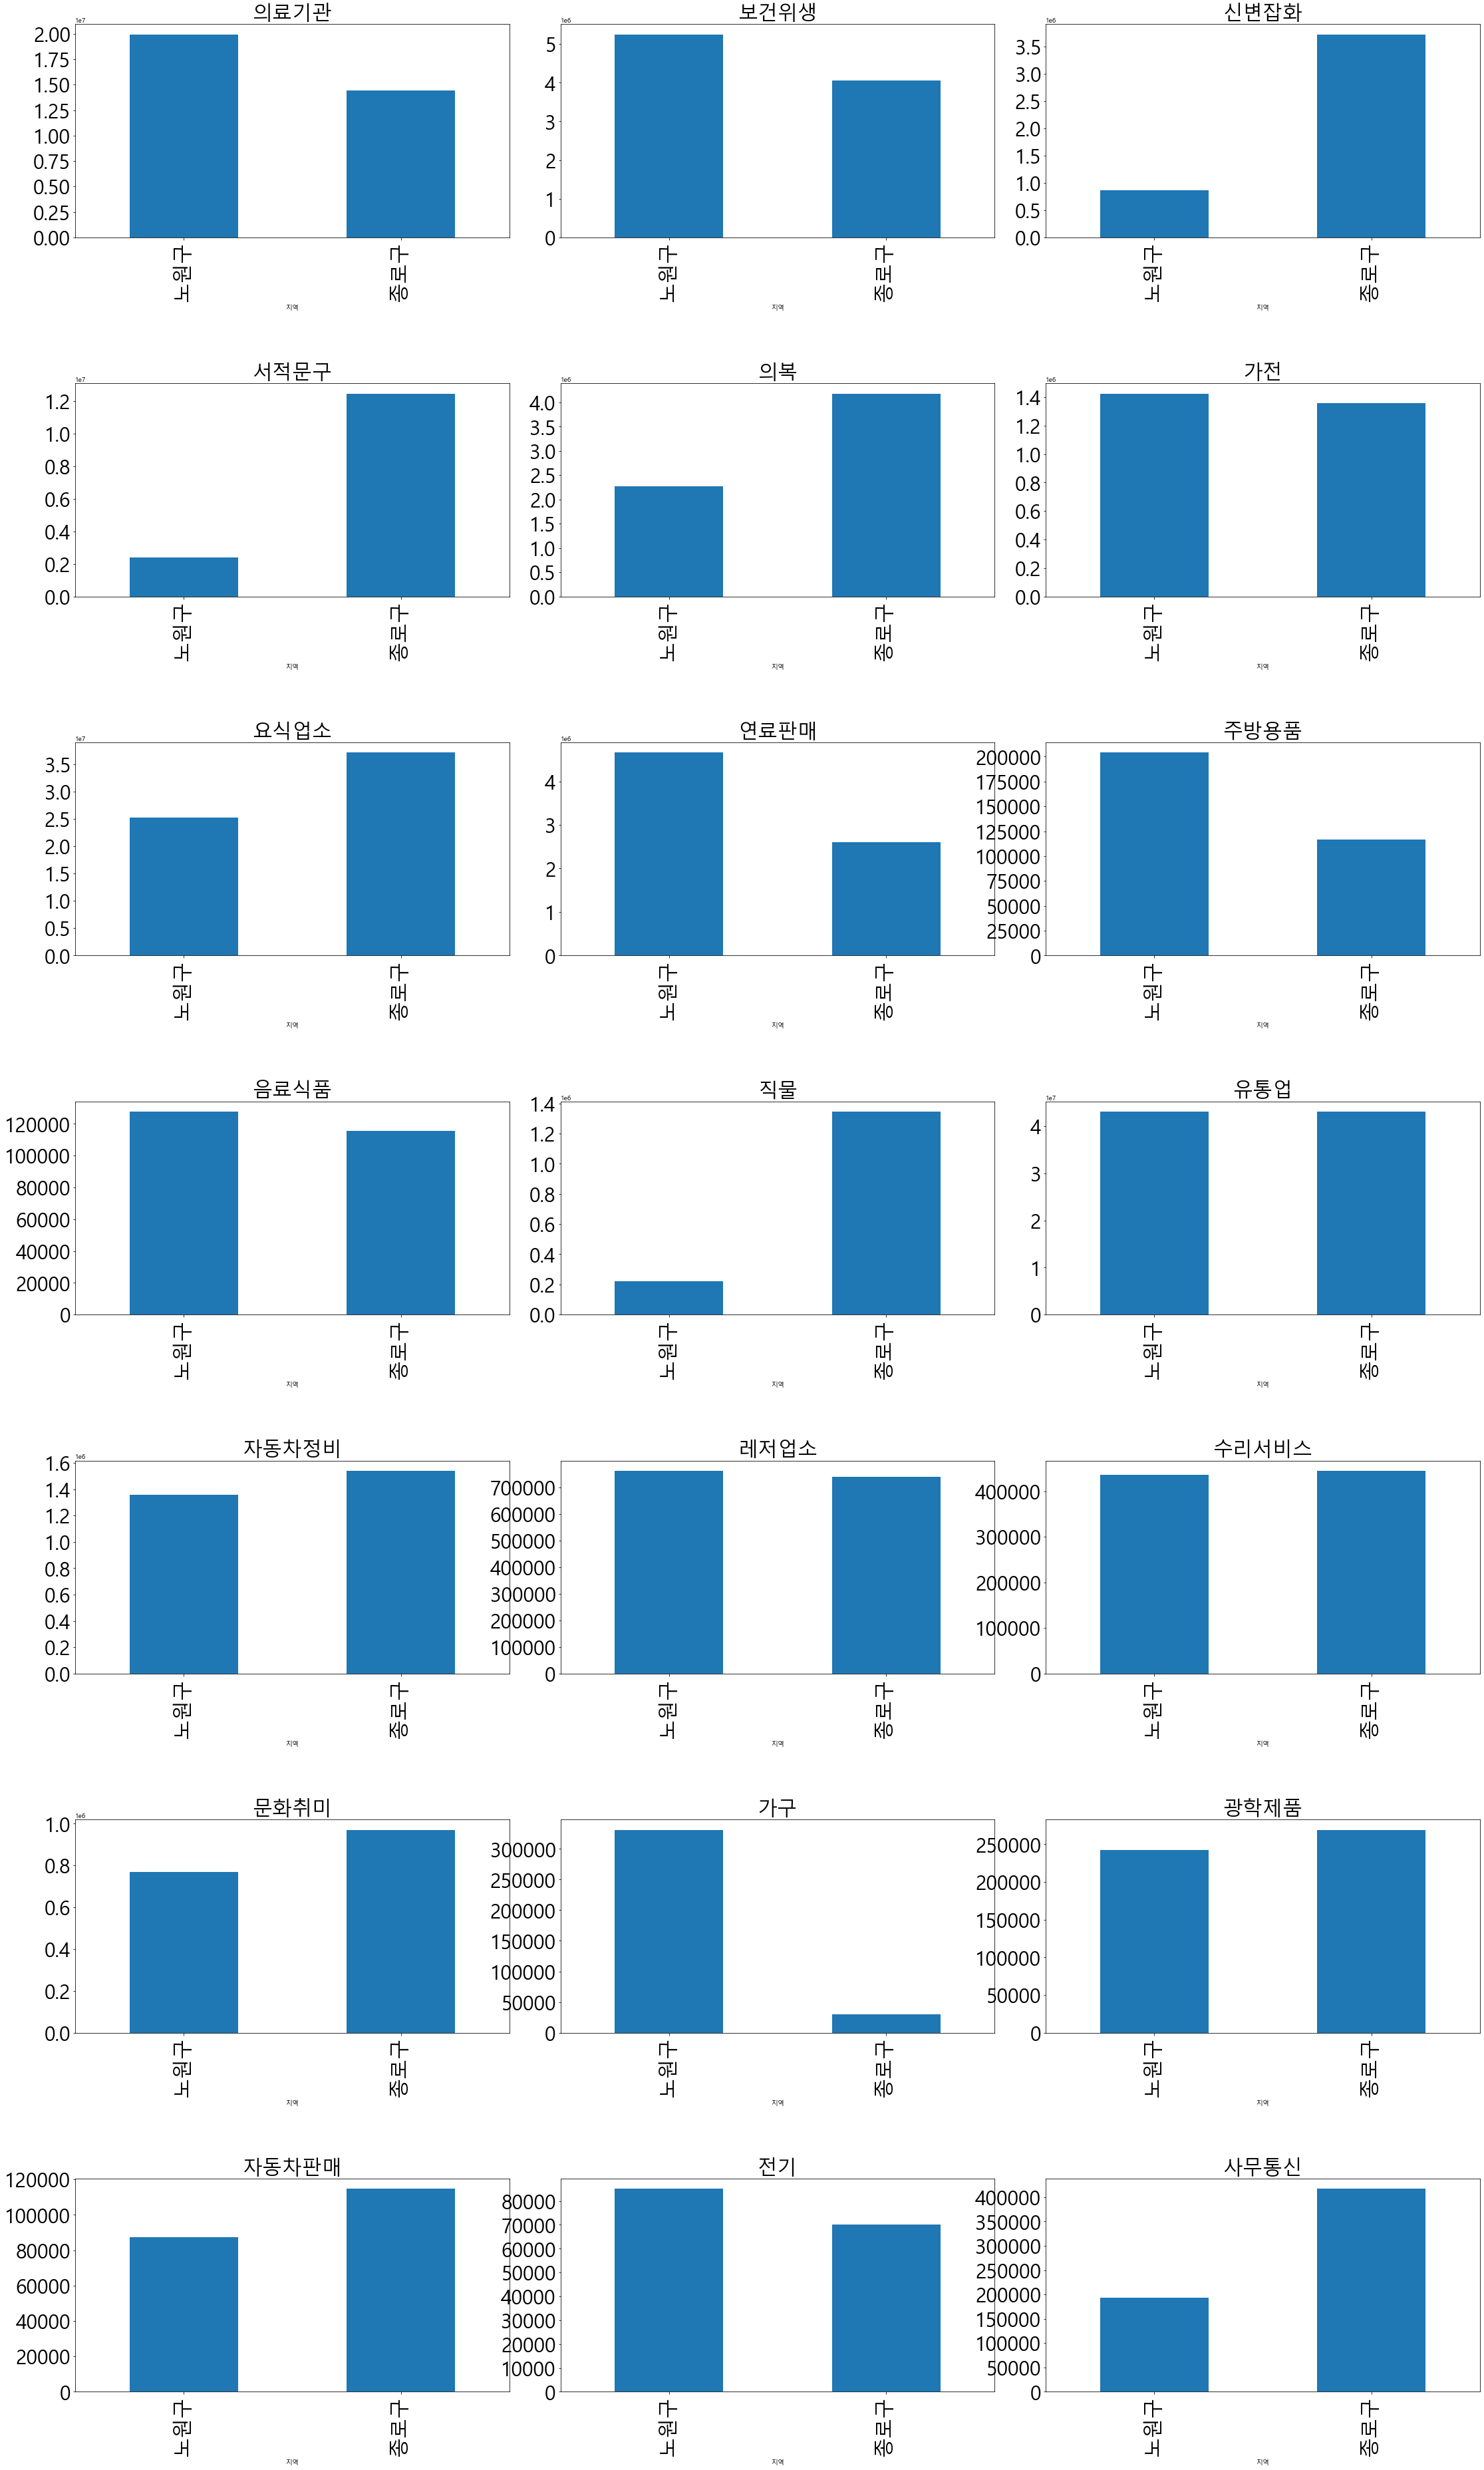

In [44]:
# 지역별-소비처업종별-총사용금액
fig = plt.figure(figsize=(30,200))
fig=plt.subplots(nrows=7, ncols=3, figsize=(30, 50))
plt.tight_layout(w_pad=5, h_pad=20)

index=1
for i in credit_card1["소비처업종"].unique():
    plt.subplot(7, 3, index)
    credit_card1[credit_card1["소비처업종"]==i].groupby("지역").sum()["사용금액"].plot.bar(fontsize=30)
    plt.title(i,fontsize=30)
    index+=1

<Figure size 2160x14400 with 0 Axes>

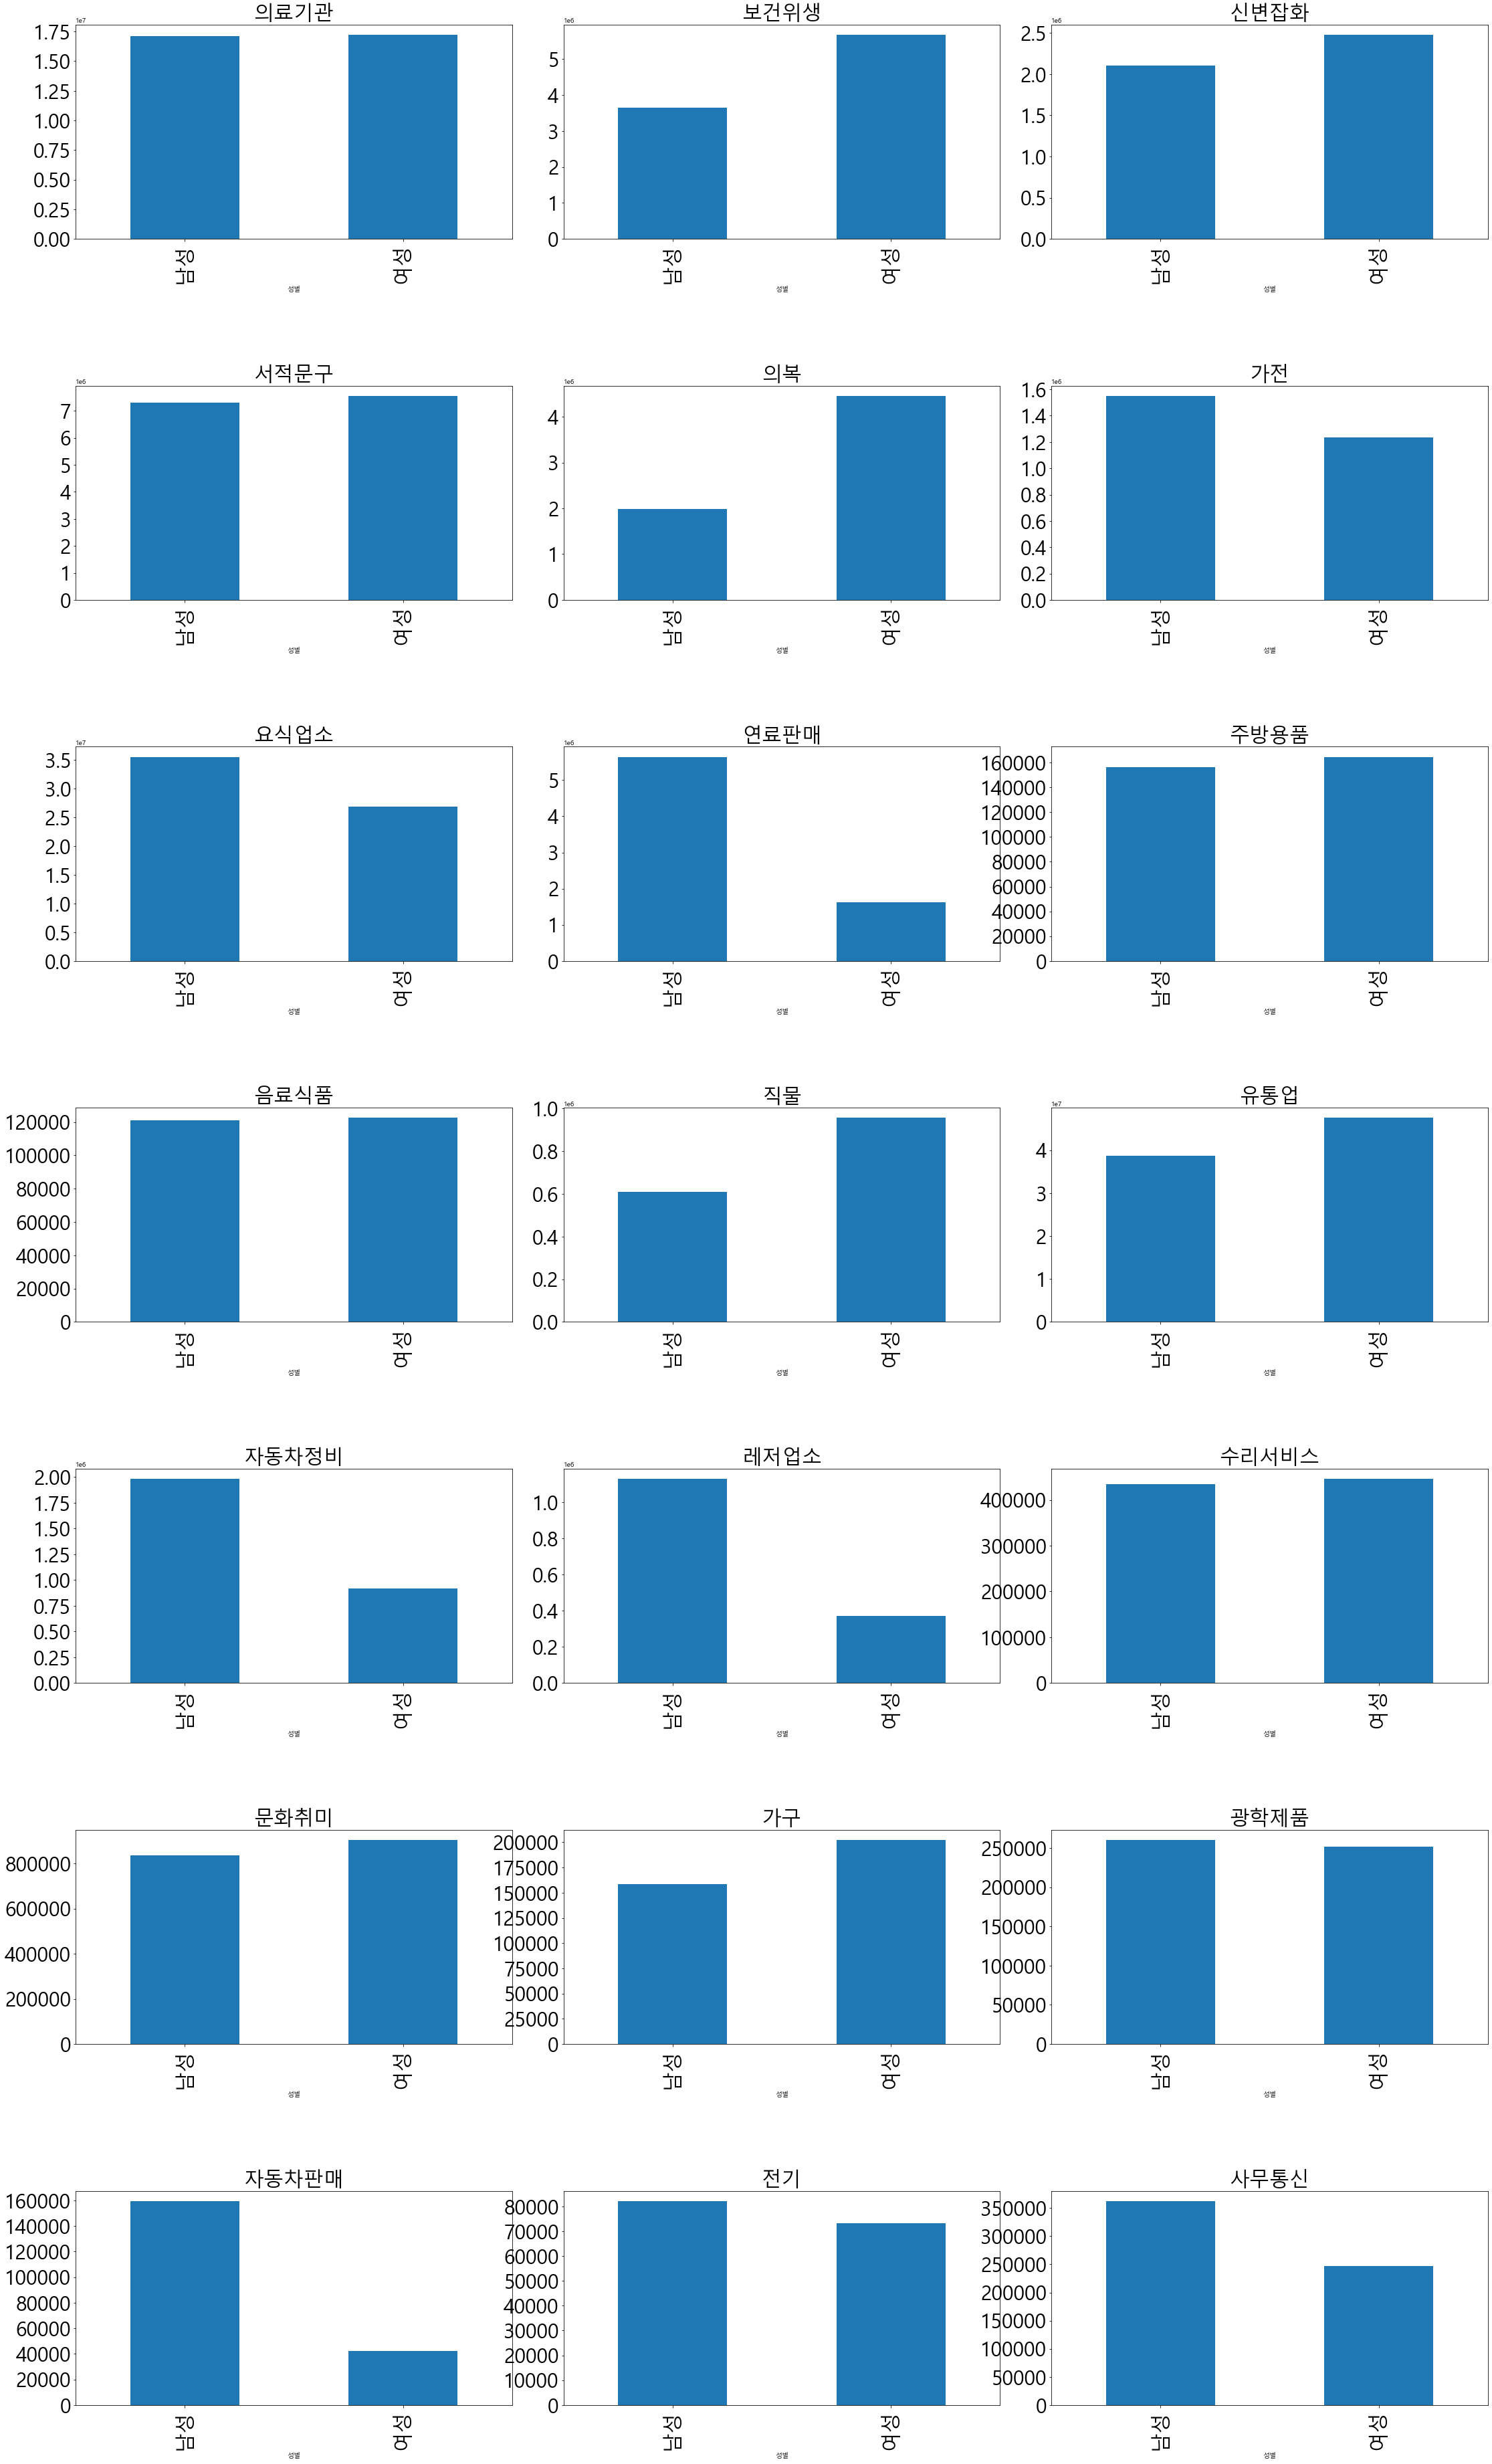

In [45]:
# 성별-소비처업종별-총사용금액
fig = plt.figure(figsize=(30,200))
fig=plt.subplots(nrows=7, ncols=3, figsize=(30, 50))
plt.tight_layout(w_pad=5, h_pad=20)

index=1
for i in credit_card1["소비처업종"].unique():
    plt.subplot(7, 3, index)
    credit_card1[credit_card1["소비처업종"]==i].groupby("성별").sum()["사용금액"].plot.bar(fontsize=30)
    plt.title(i,fontsize=30)
    index+=1

<Figure size 2160x14400 with 0 Axes>

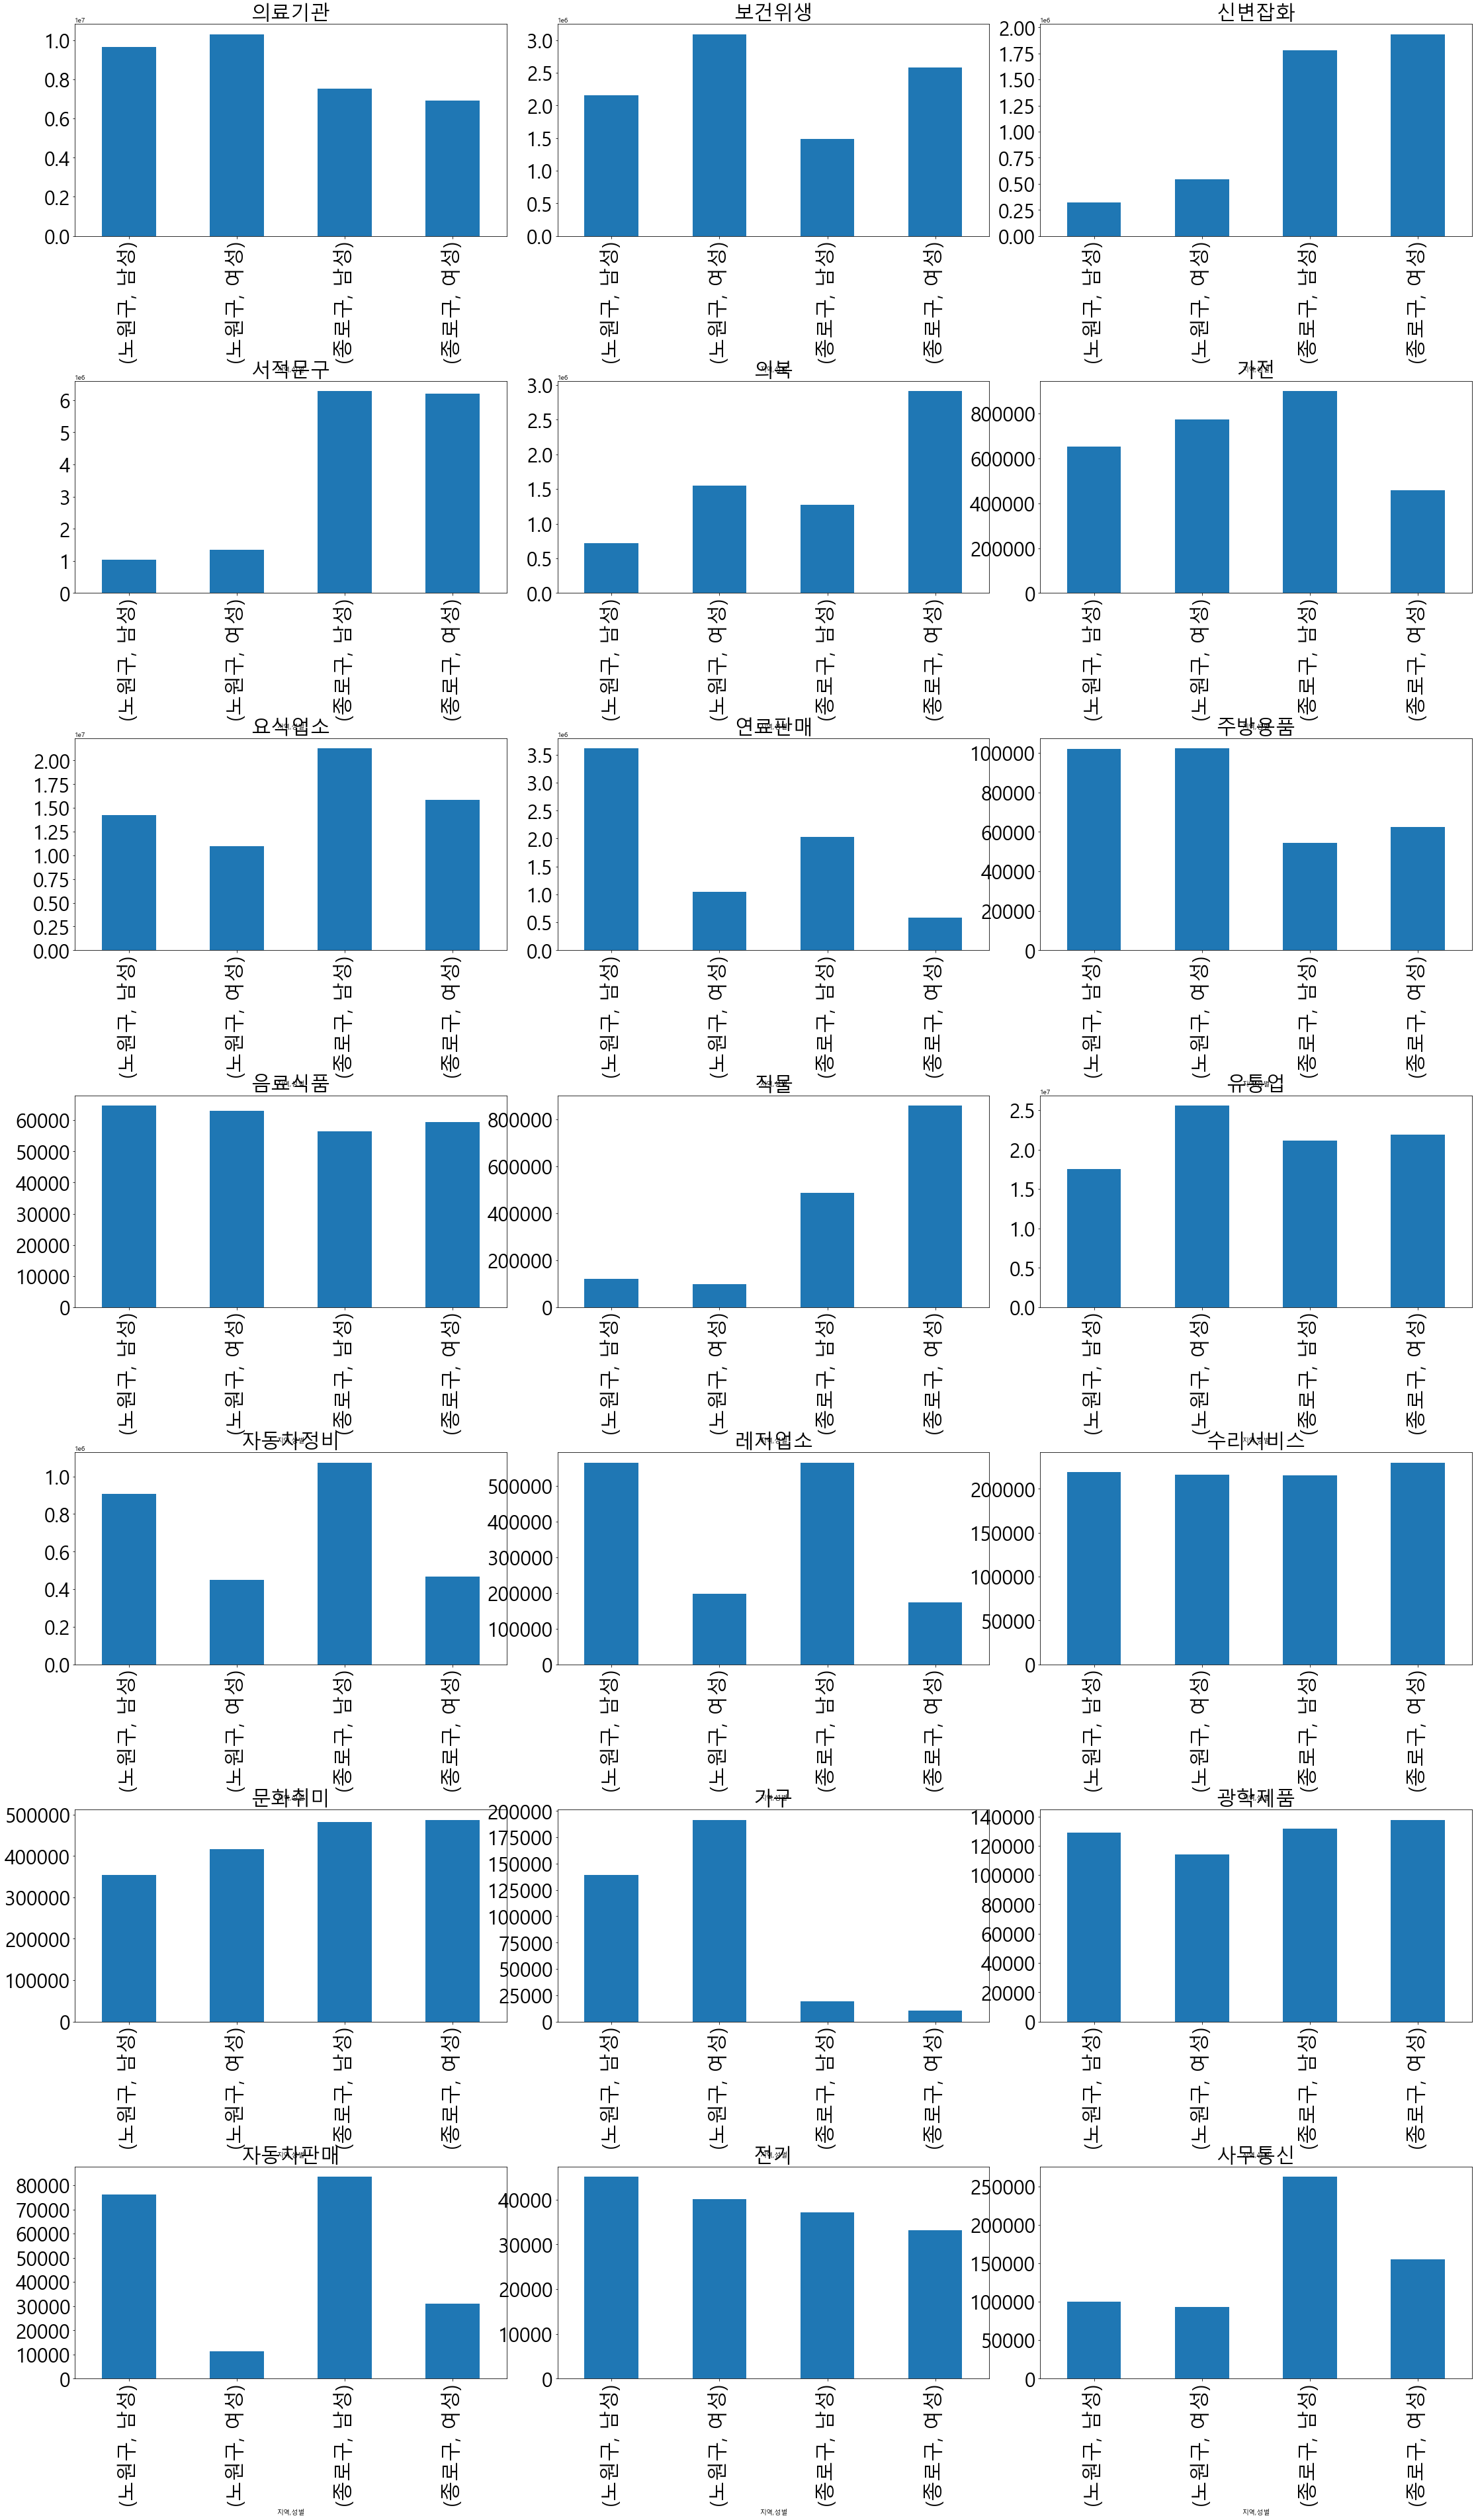

In [46]:
# (지역별, 성별) - 총사용금액
fig = plt.figure(figsize=(30,200))
fig=plt.subplots(nrows=7, ncols=3, figsize=(30, 50))
plt.tight_layout(w_pad=5, h_pad=20)

index=1
for i in credit_card1["소비처업종"].unique():
    plt.subplot(7, 3, index)
    credit_card1[credit_card1["소비처업종"]==i].groupby(["지역", "성별"]).sum()["사용금액"].plot.bar(fontsize=30)
    plt.title(i,fontsize=30)
    index+=1

<Figure size 2160x14400 with 0 Axes>

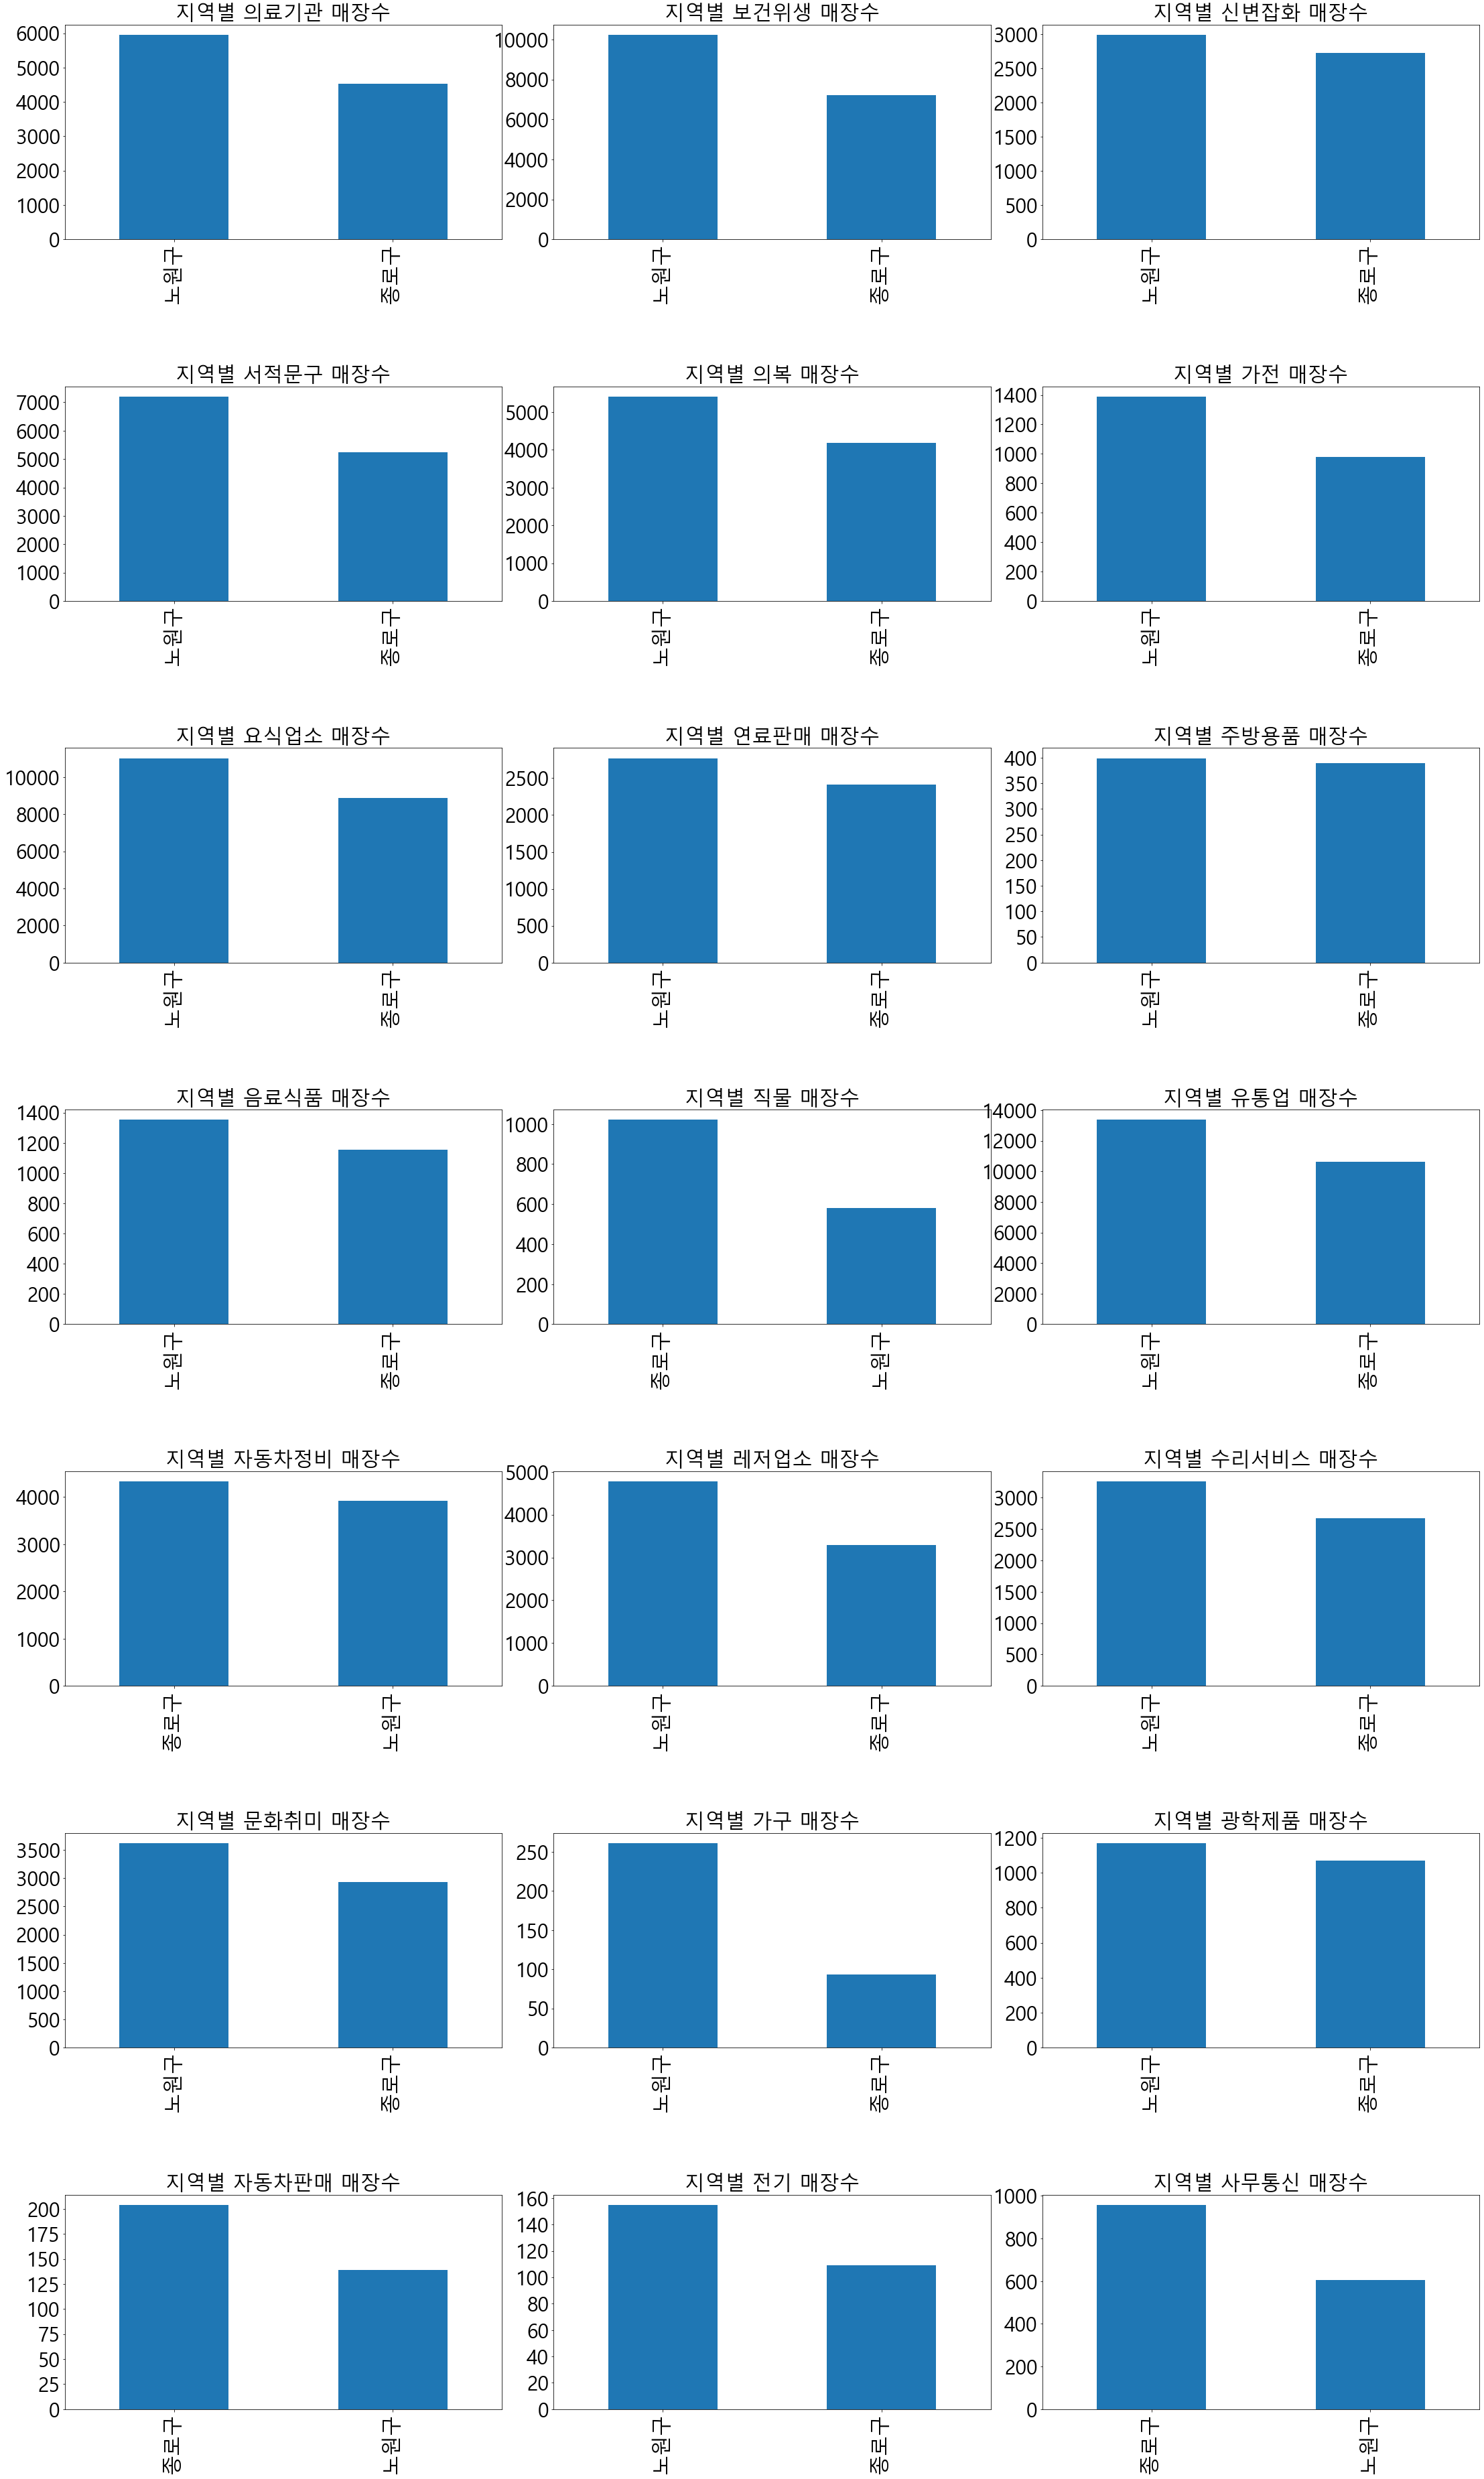

In [47]:
# 지역별 소비처업종 총수
fig = plt.figure(figsize=(30,200))
fig=plt.subplots(nrows=7, ncols=3, figsize=(30, 50))
plt.tight_layout(w_pad=5, h_pad=20)


index=1
for i in credit_card1["소비처업종"].unique():
    
    plt.subplot(7, 3, index)
    credit_card1[credit_card1["소비처업종"]==i]["지역"].value_counts().plot.bar(fontsize=30)
    plt.title("지역별 "+i+" 매장수", fontsize=30)
    index+=1

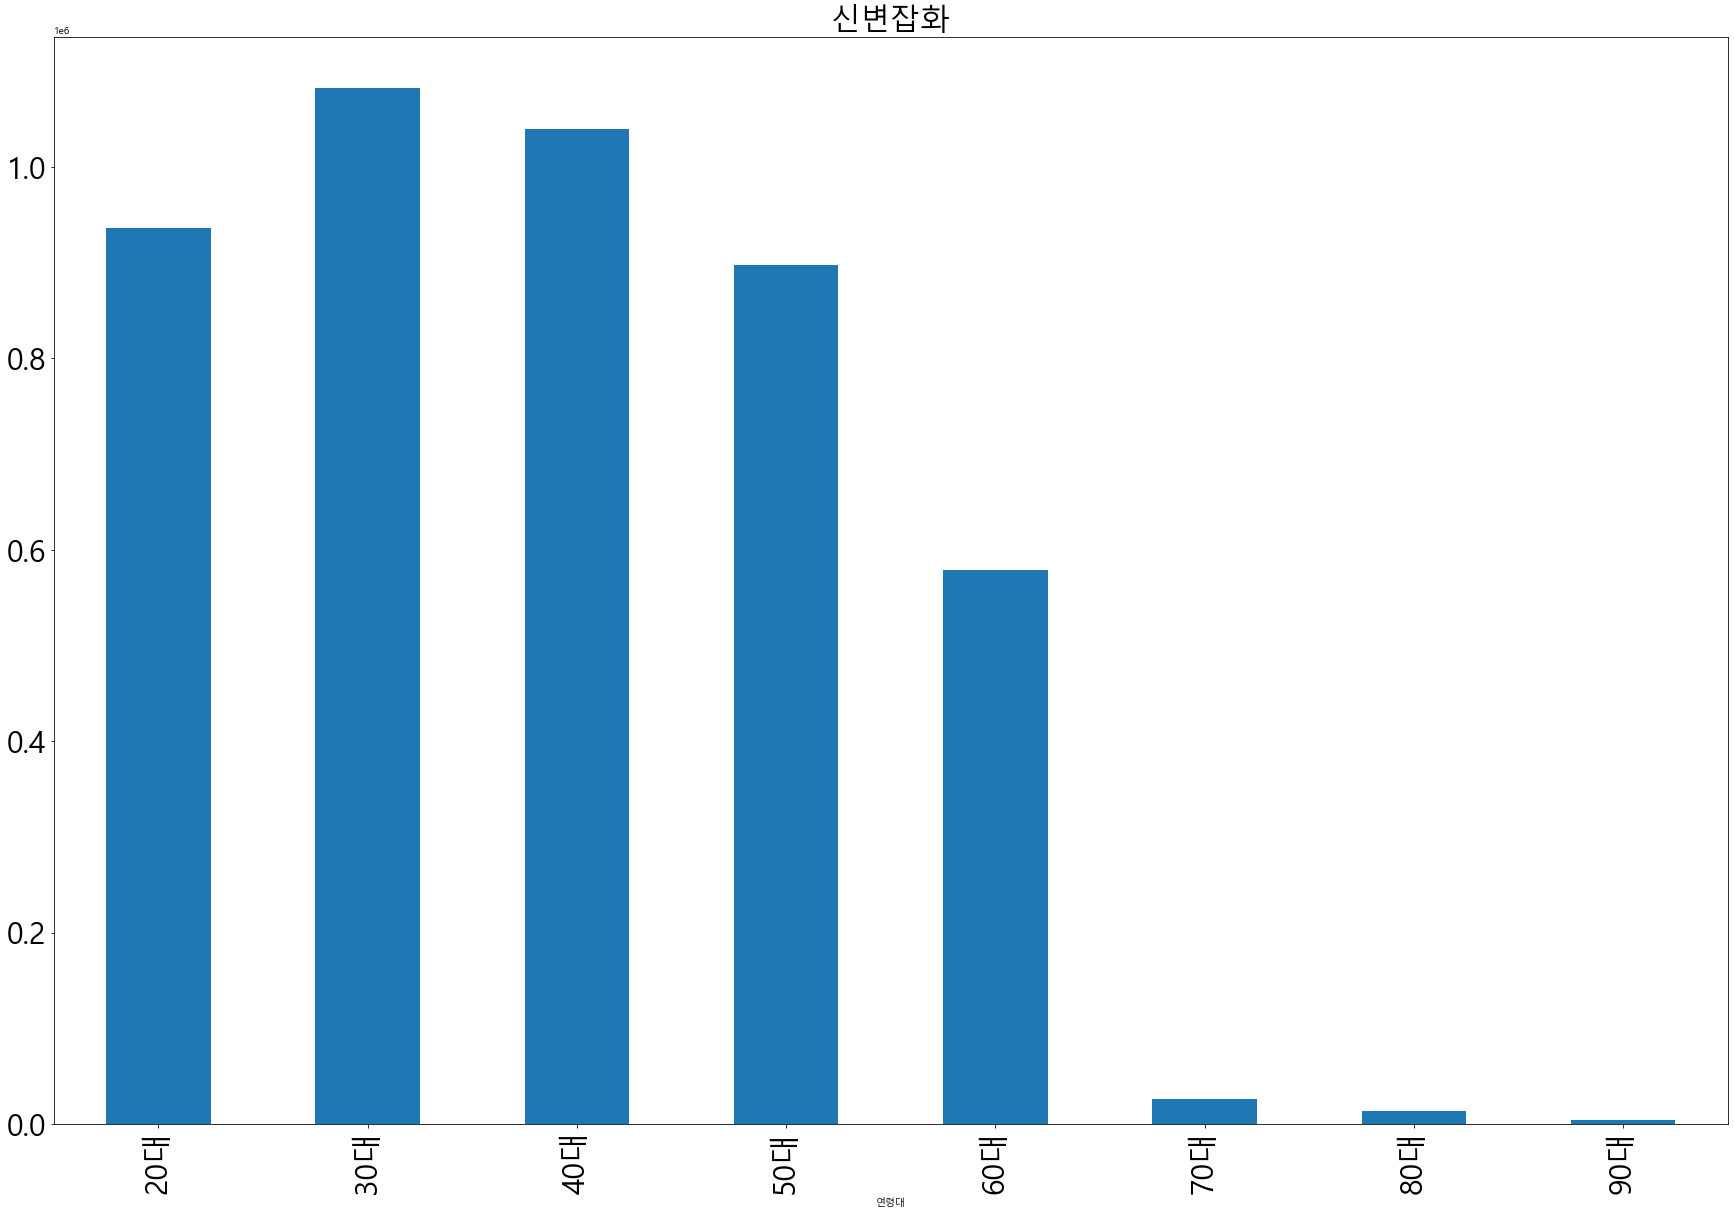

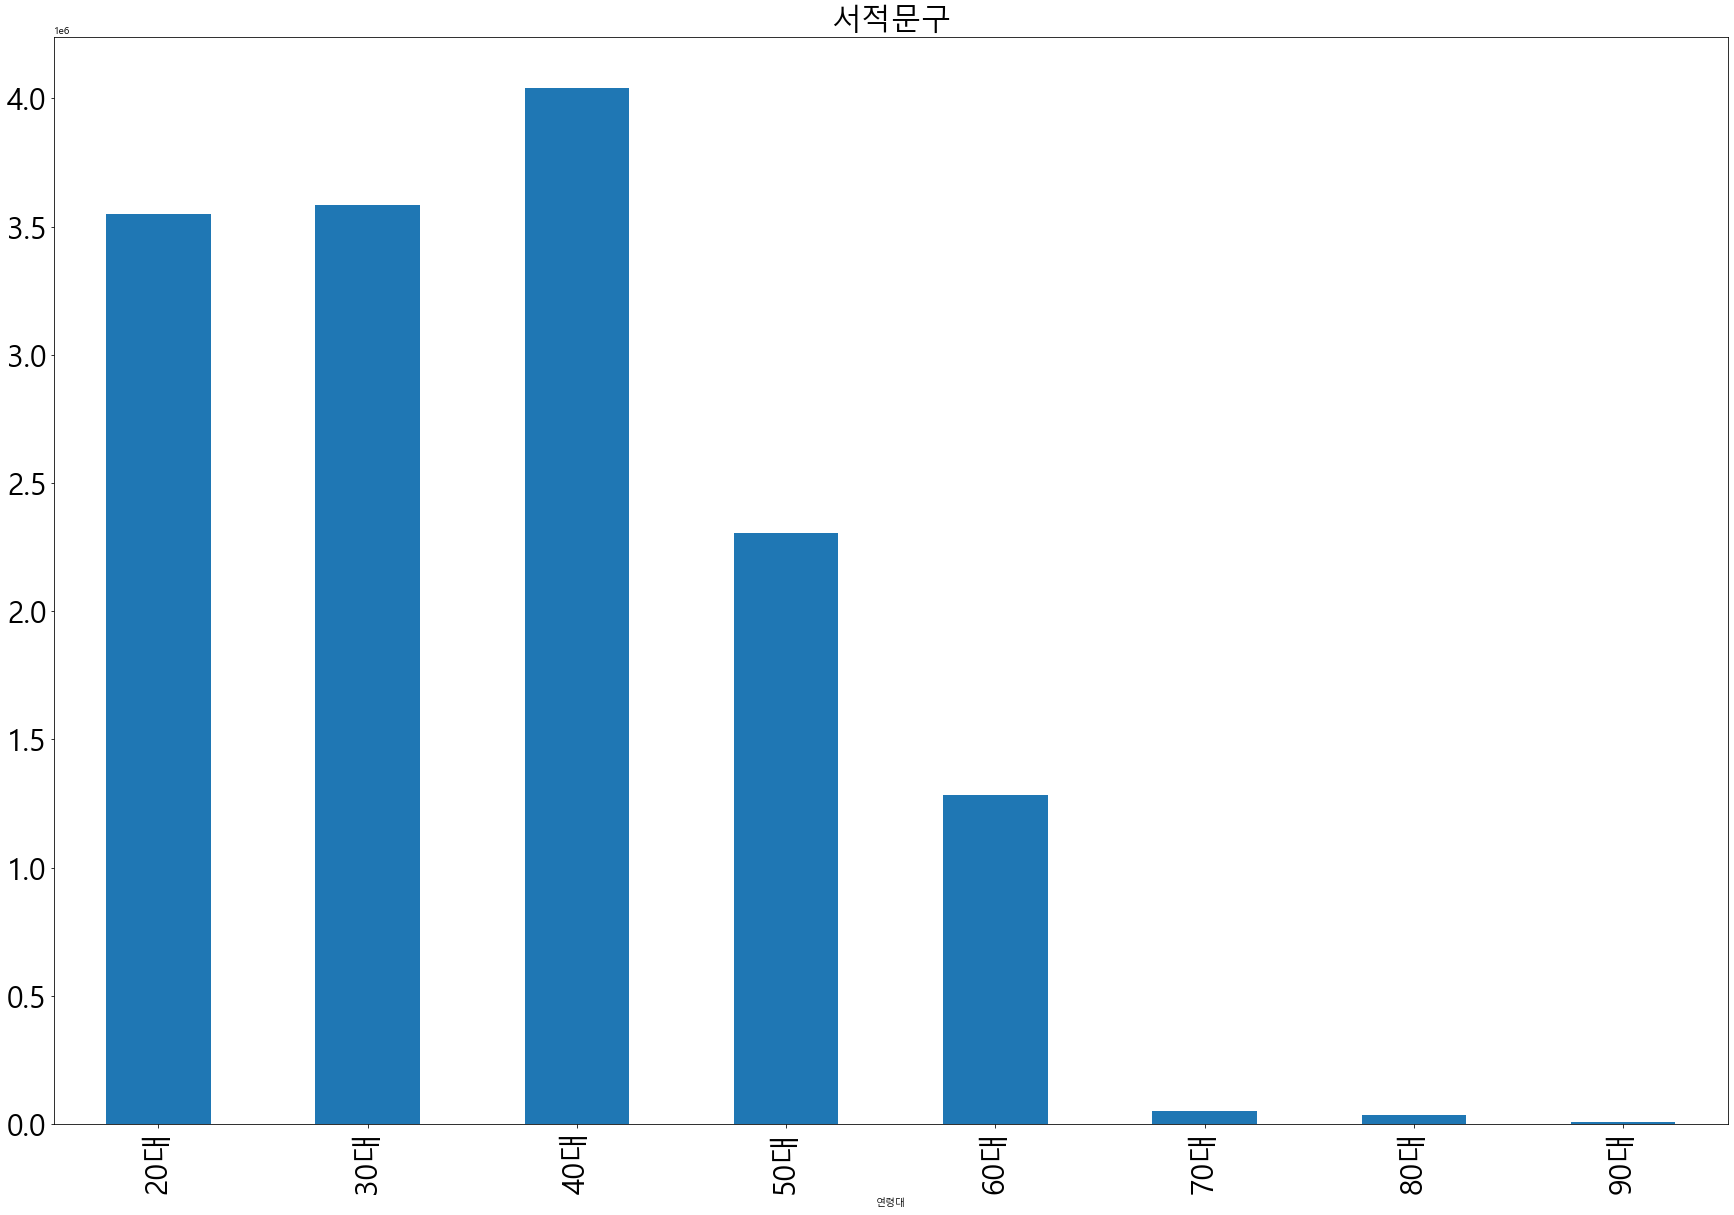

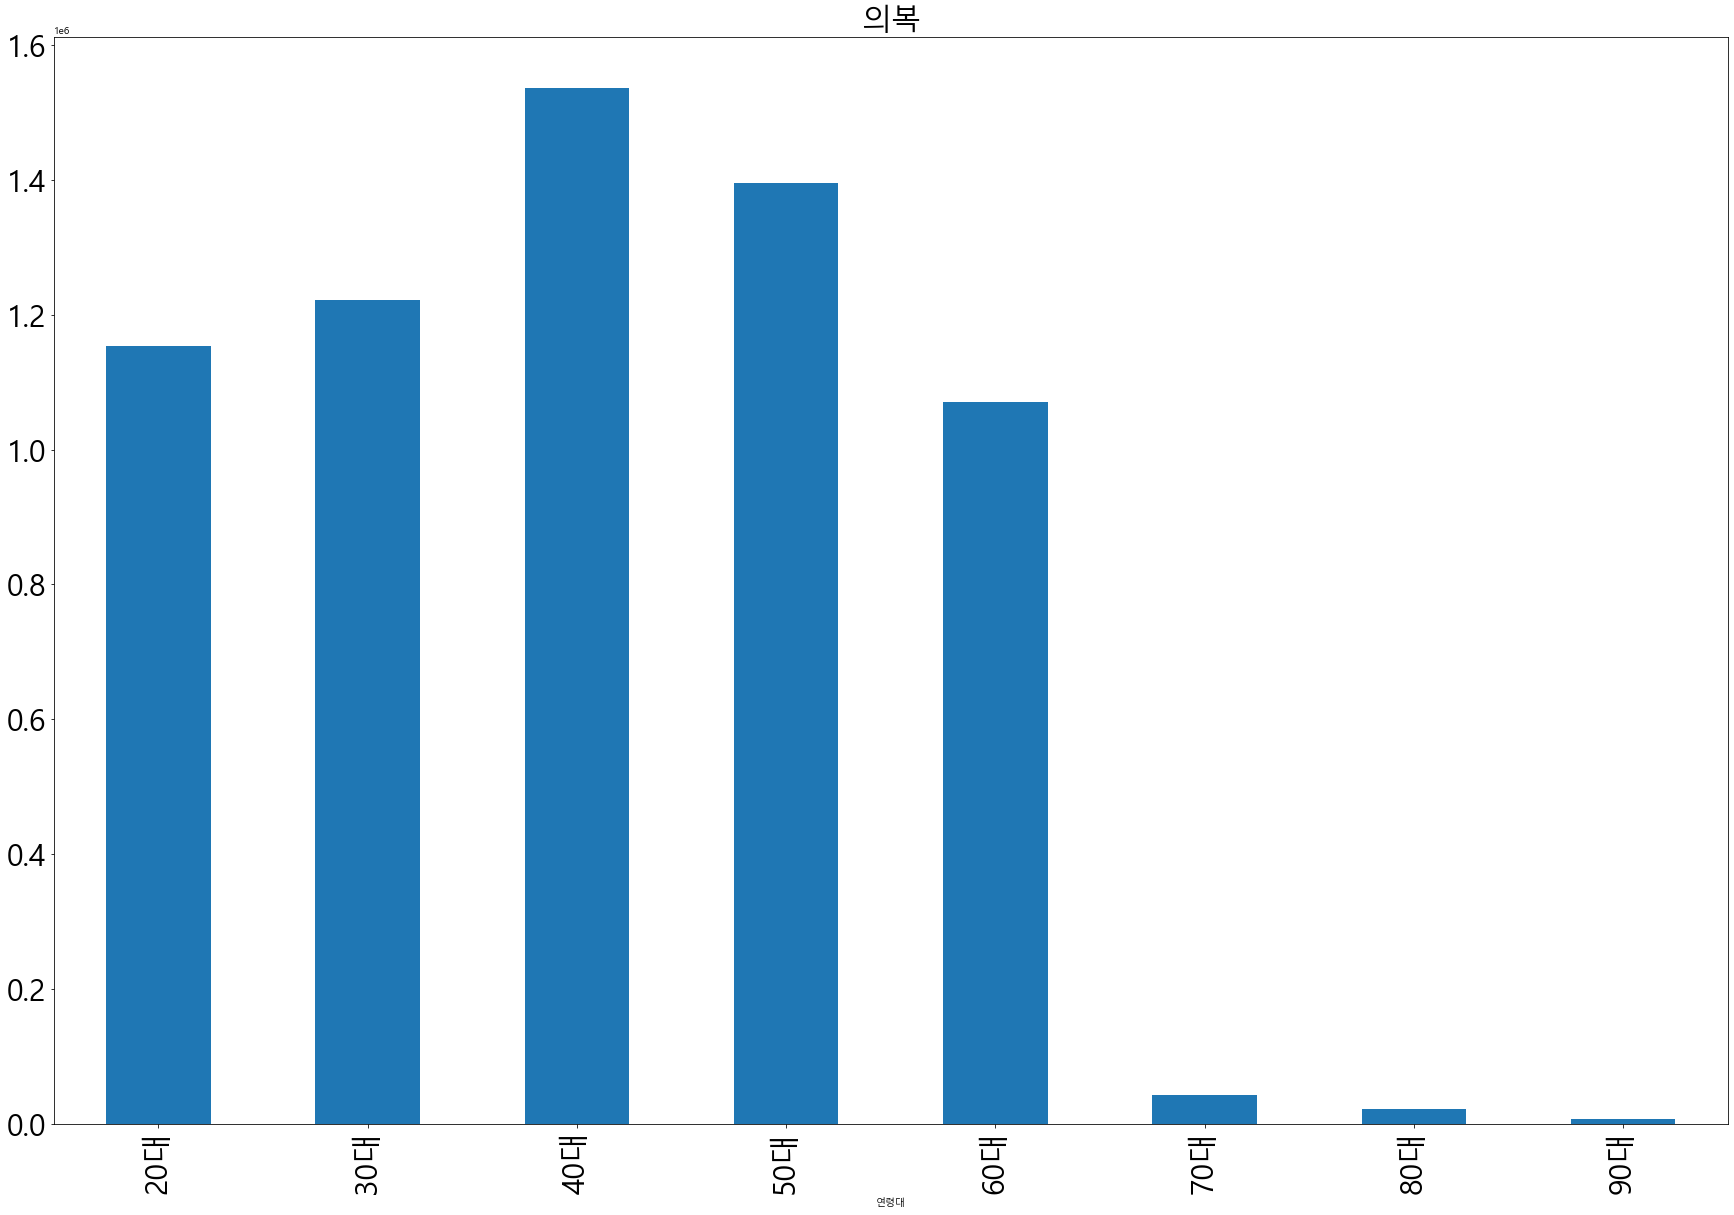

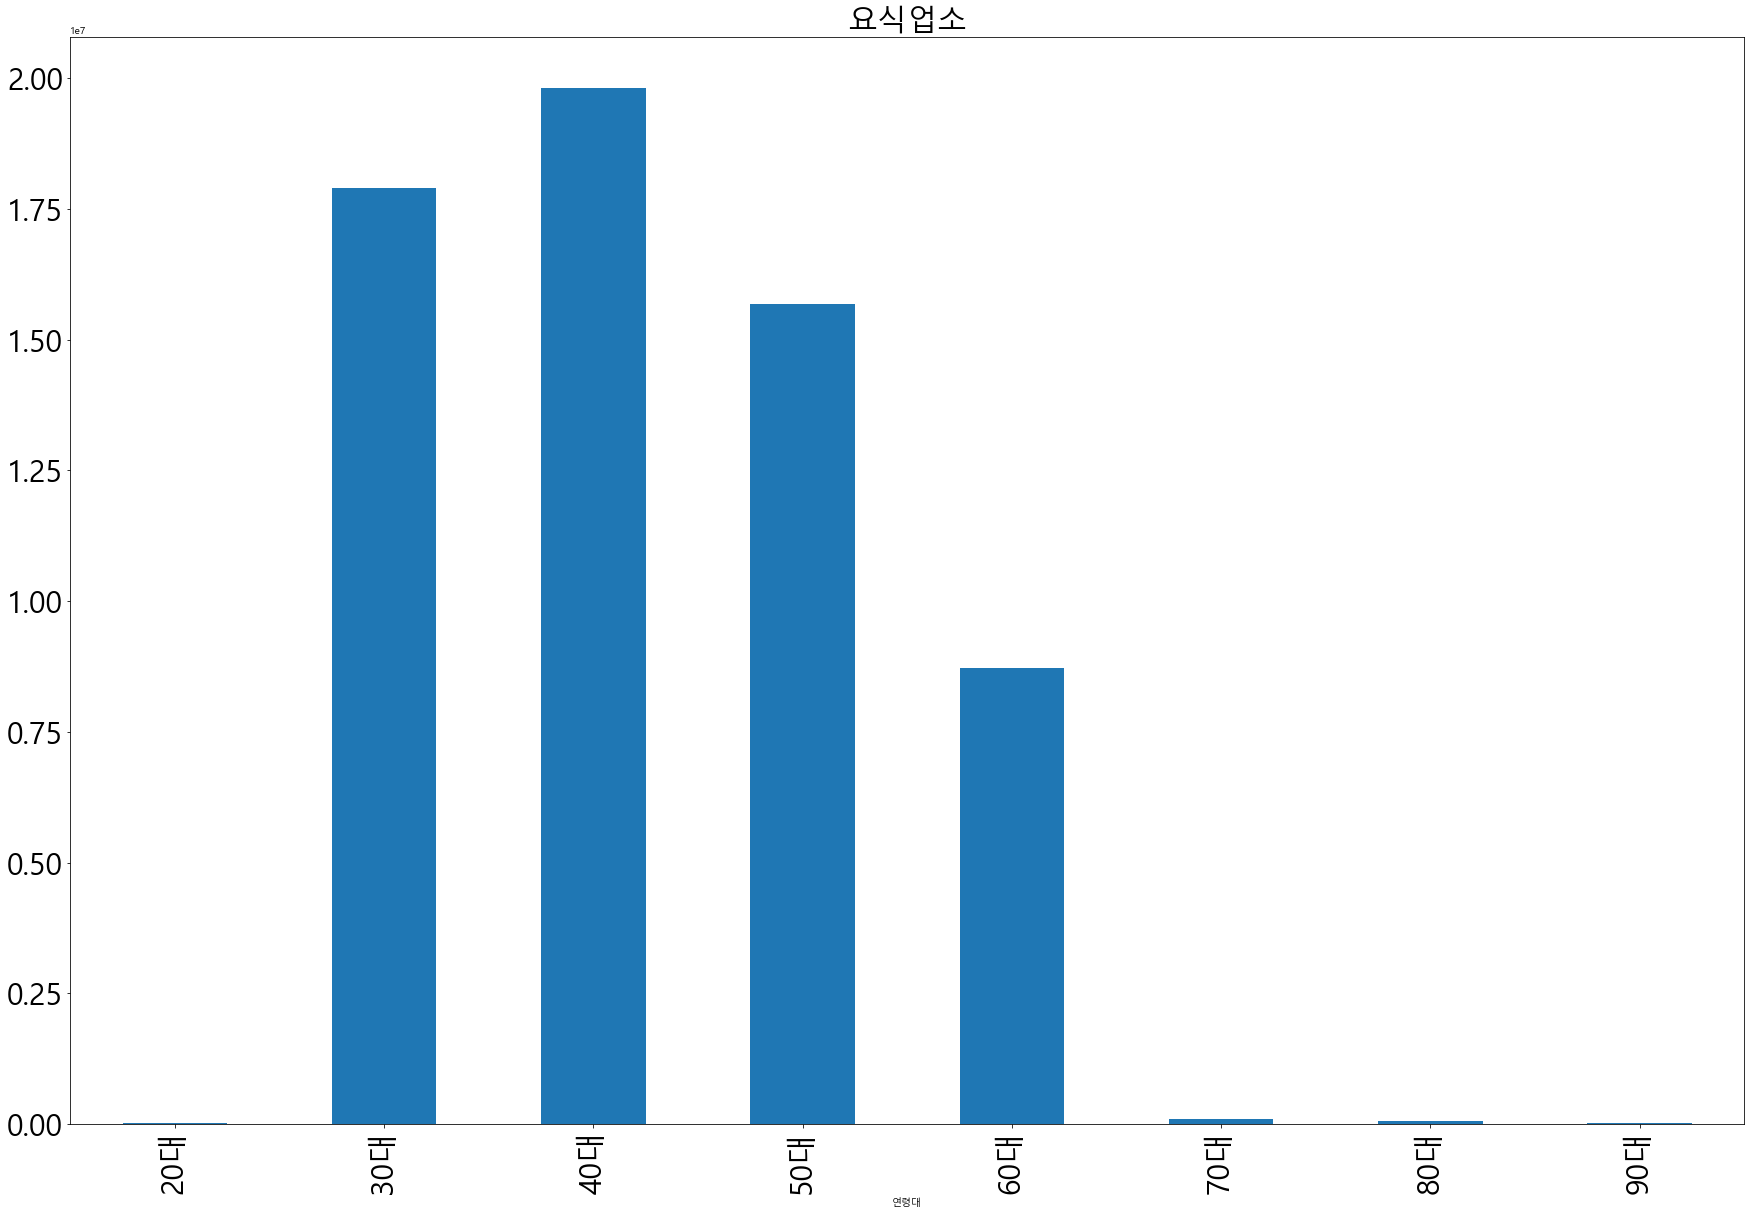

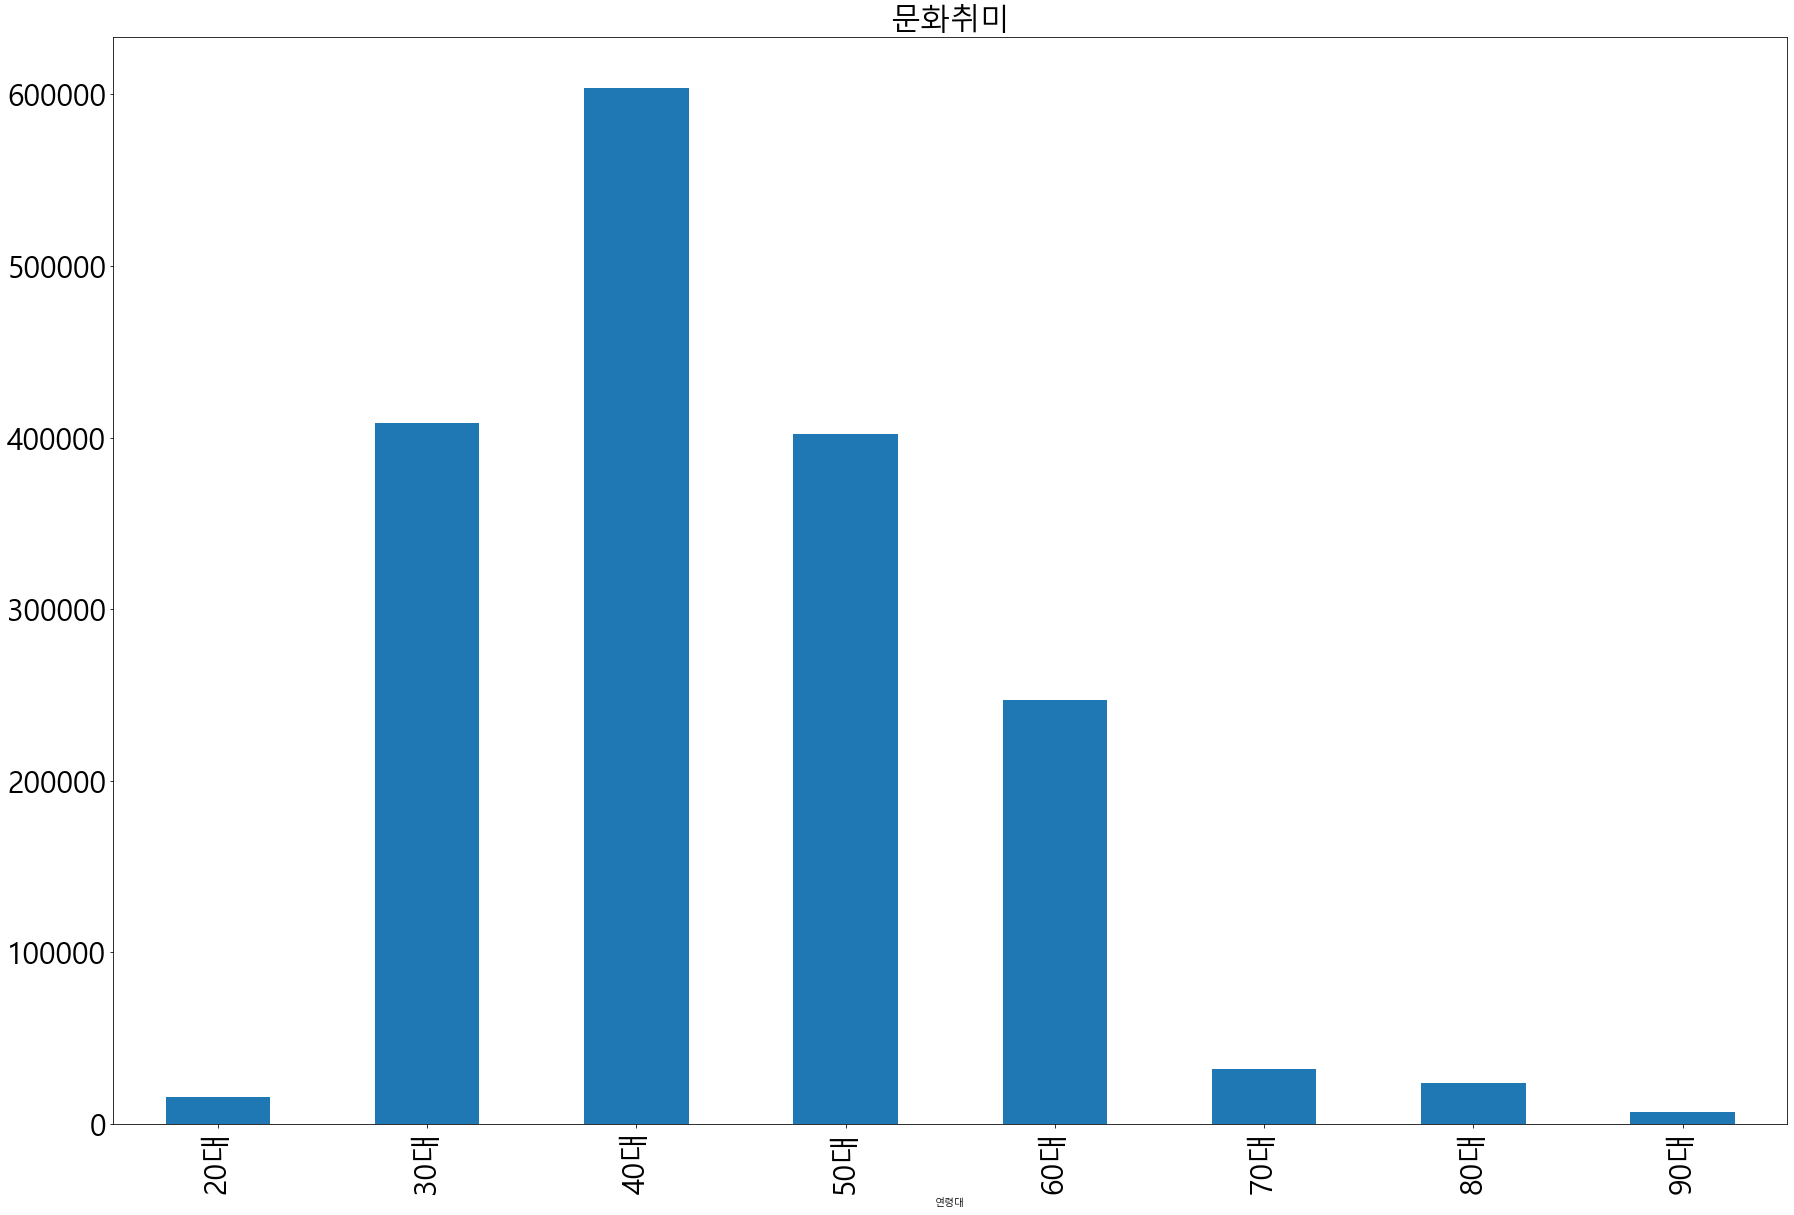

In [48]:
list_=["신변잡화", "서적문구", "의복", "요식업소", "문화취미"]

for i in list_:
    
    #plt.subplot(5, 1, index)
    fig=plt.figure(figsize=(30, 20))
    credit_card1[credit_card1["소비처업종"]==i].groupby("연령대").sum()["사용금액"].plot.bar(fontsize=30)
    plt.title(i, fontsize=30)
    index+=1

In [49]:
merge_data3=pd.merge(merge_data1, merge_data2)
merge_data3.head()

,Card_ID,분류,혜택분야,카드명,후불교통,가족카드,현금기능,IC기능,사용일자,지역,...,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,과거통화횟수,계약여부,연락일자,경제활동
0,87,신용카드,life,S카드 D-day,0,1,0,0,20180401,종로구,...,미확인,없음,없음,휴대폰,225,7,0,no,2018-03-18,경제활동인구
1,87,신용카드,life,S카드 D-day,0,1,0,0,20180401,종로구,...,없음,대출있음,없음,휴대폰,873,8,0,yes,2018-05-20,경제활동인구
2,87,신용카드,life,S카드 D-day,0,1,0,0,20180401,종로구,...,없음,없음,없음,휴대폰,129,1,0,no,2018-05-27,경제활동인구
3,87,신용카드,life,S카드 D-day,0,1,0,0,20180603,노원구,...,미확인,없음,없음,휴대폰,225,7,0,no,2018-03-18,경제활동인구
4,87,신용카드,life,S카드 D-day,0,1,0,0,20180603,노원구,...,없음,대출있음,없음,휴대폰,873,8,0,yes,2018-05-20,경제활동인구


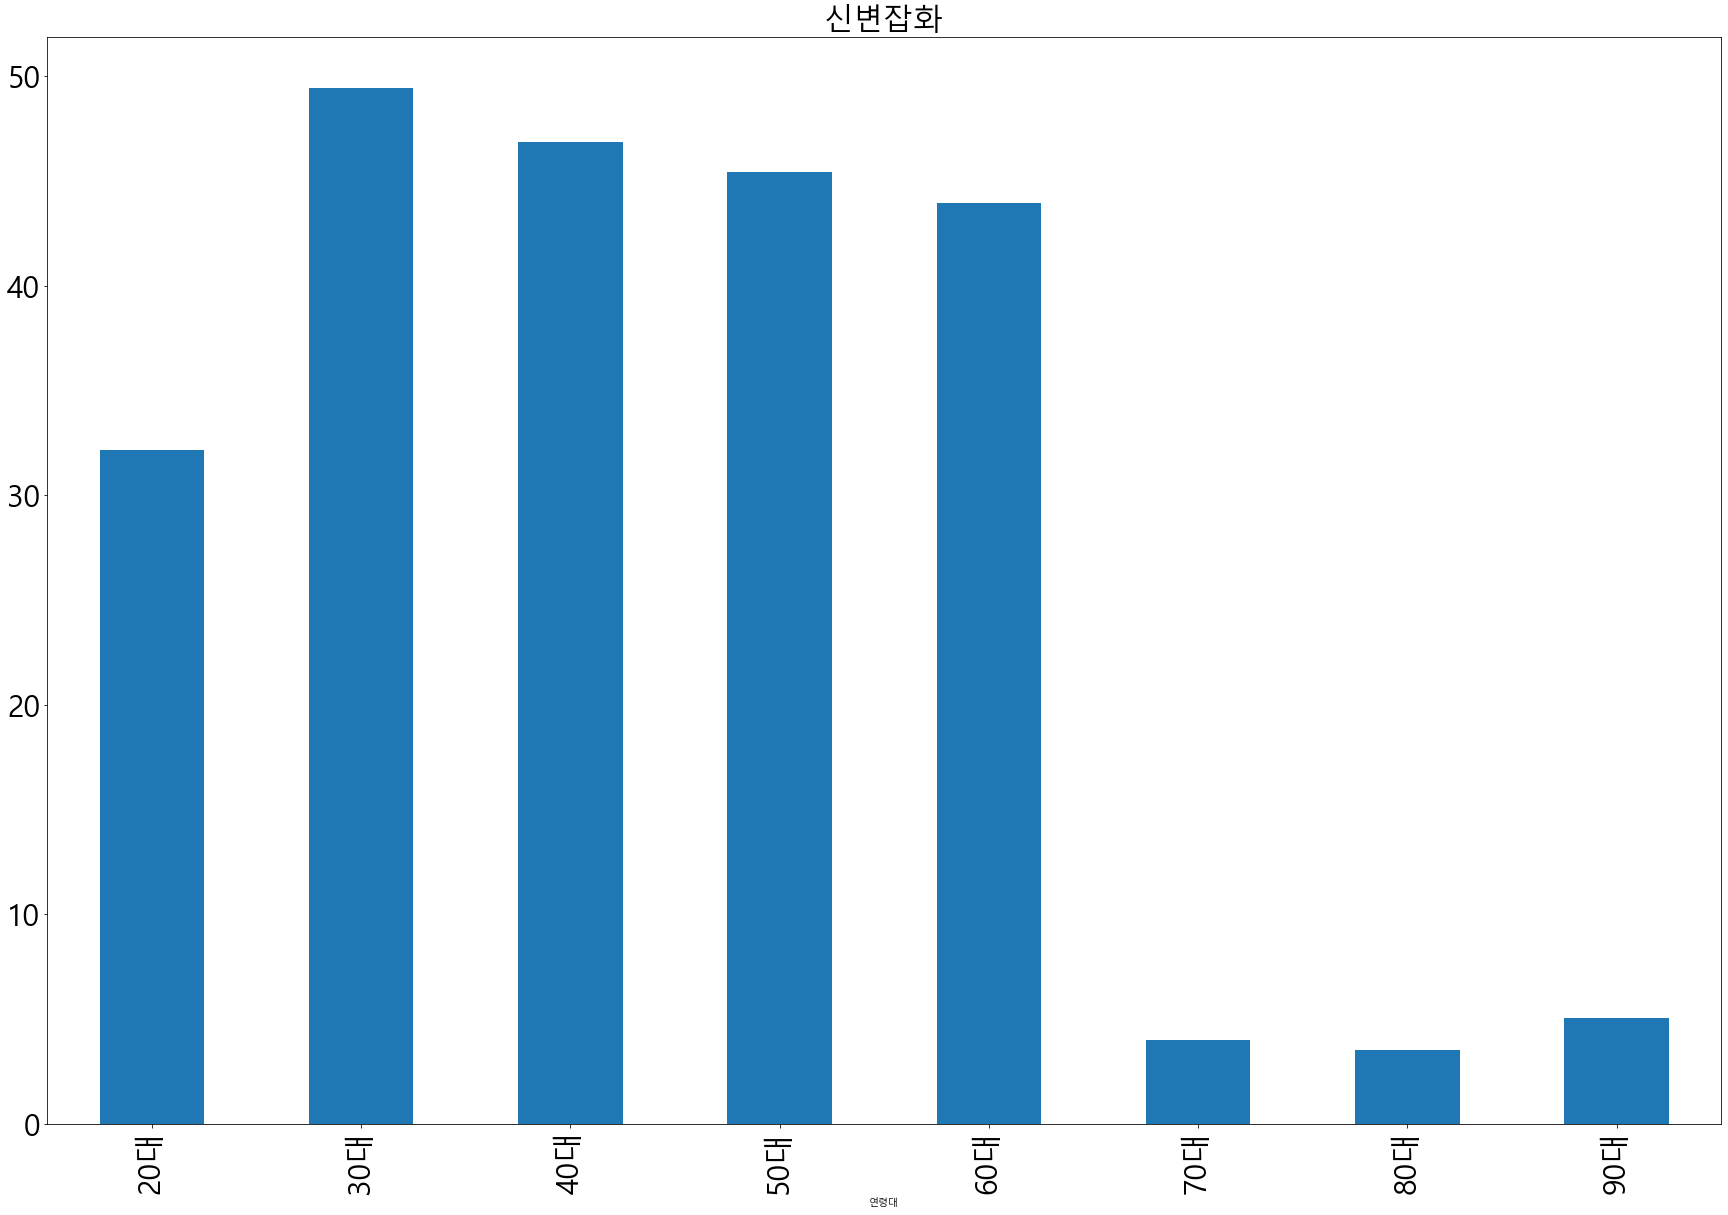

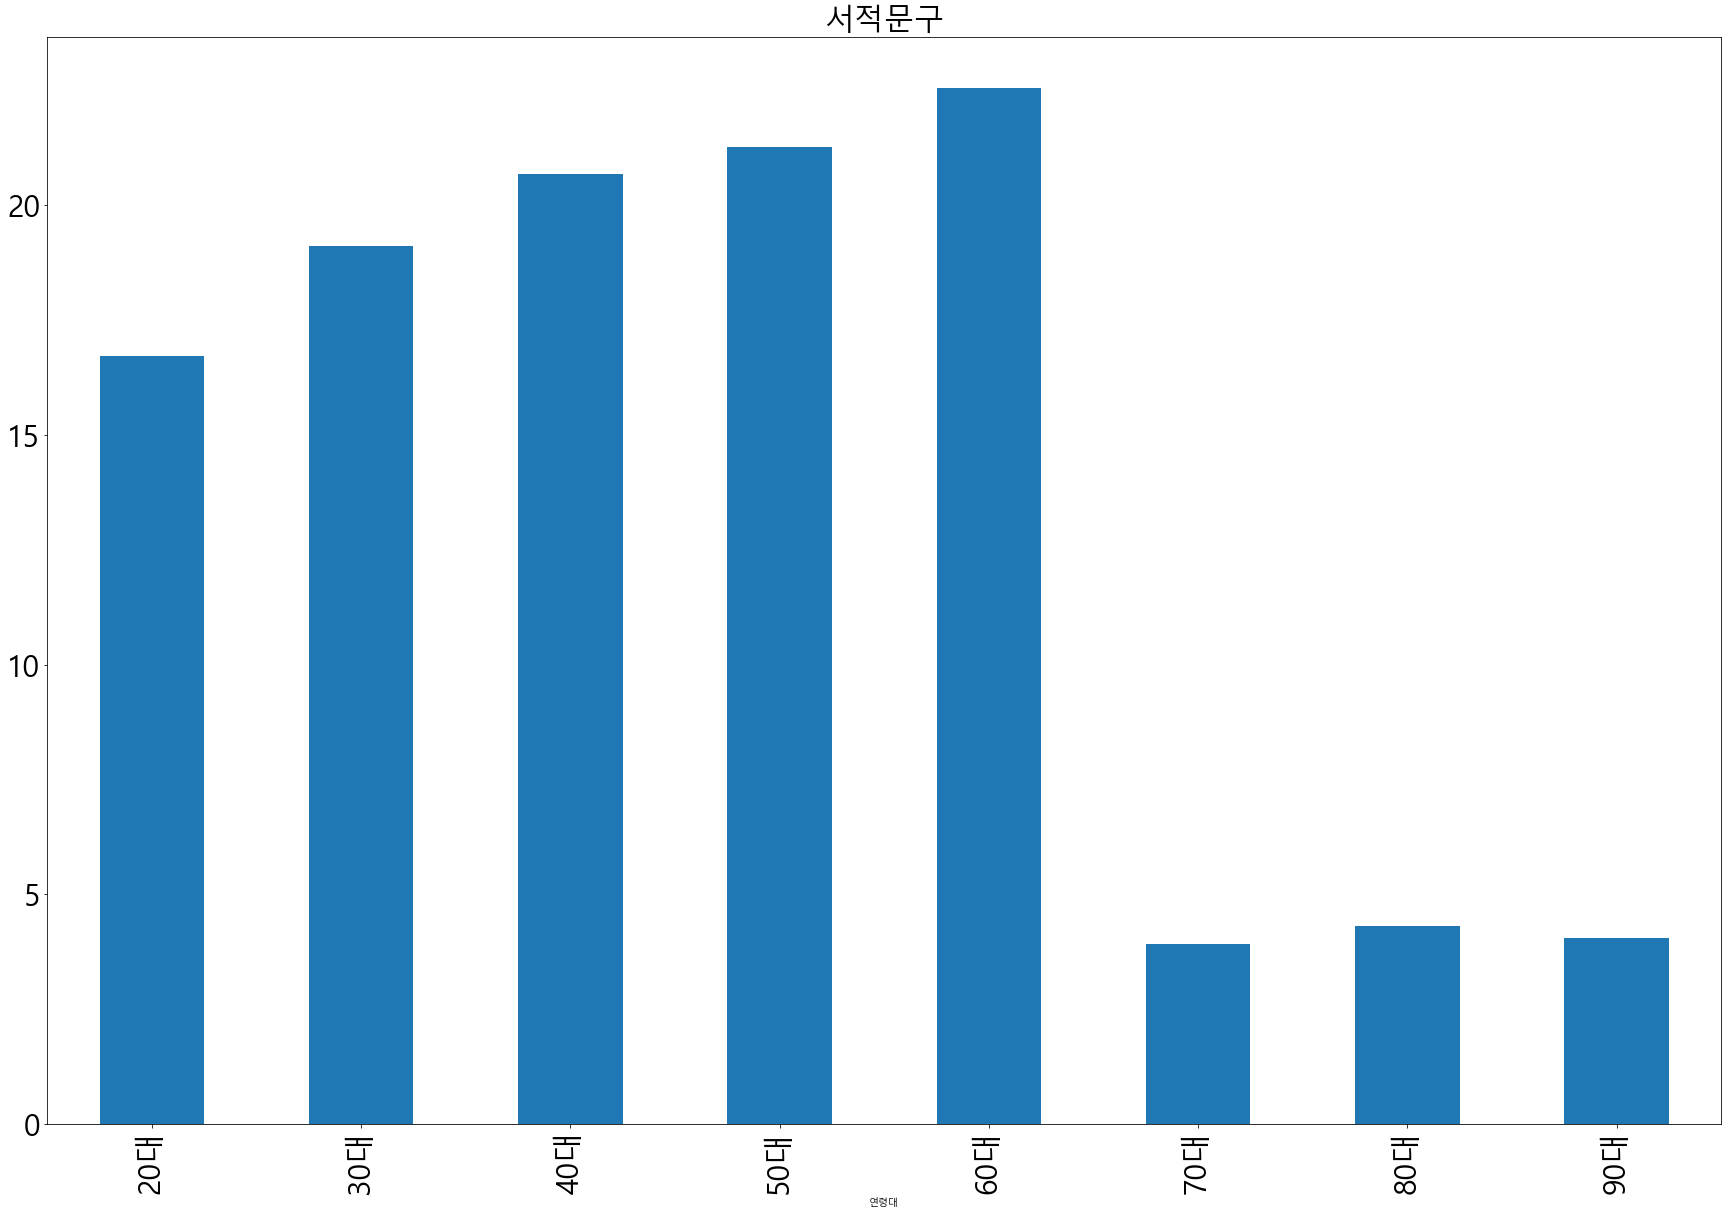

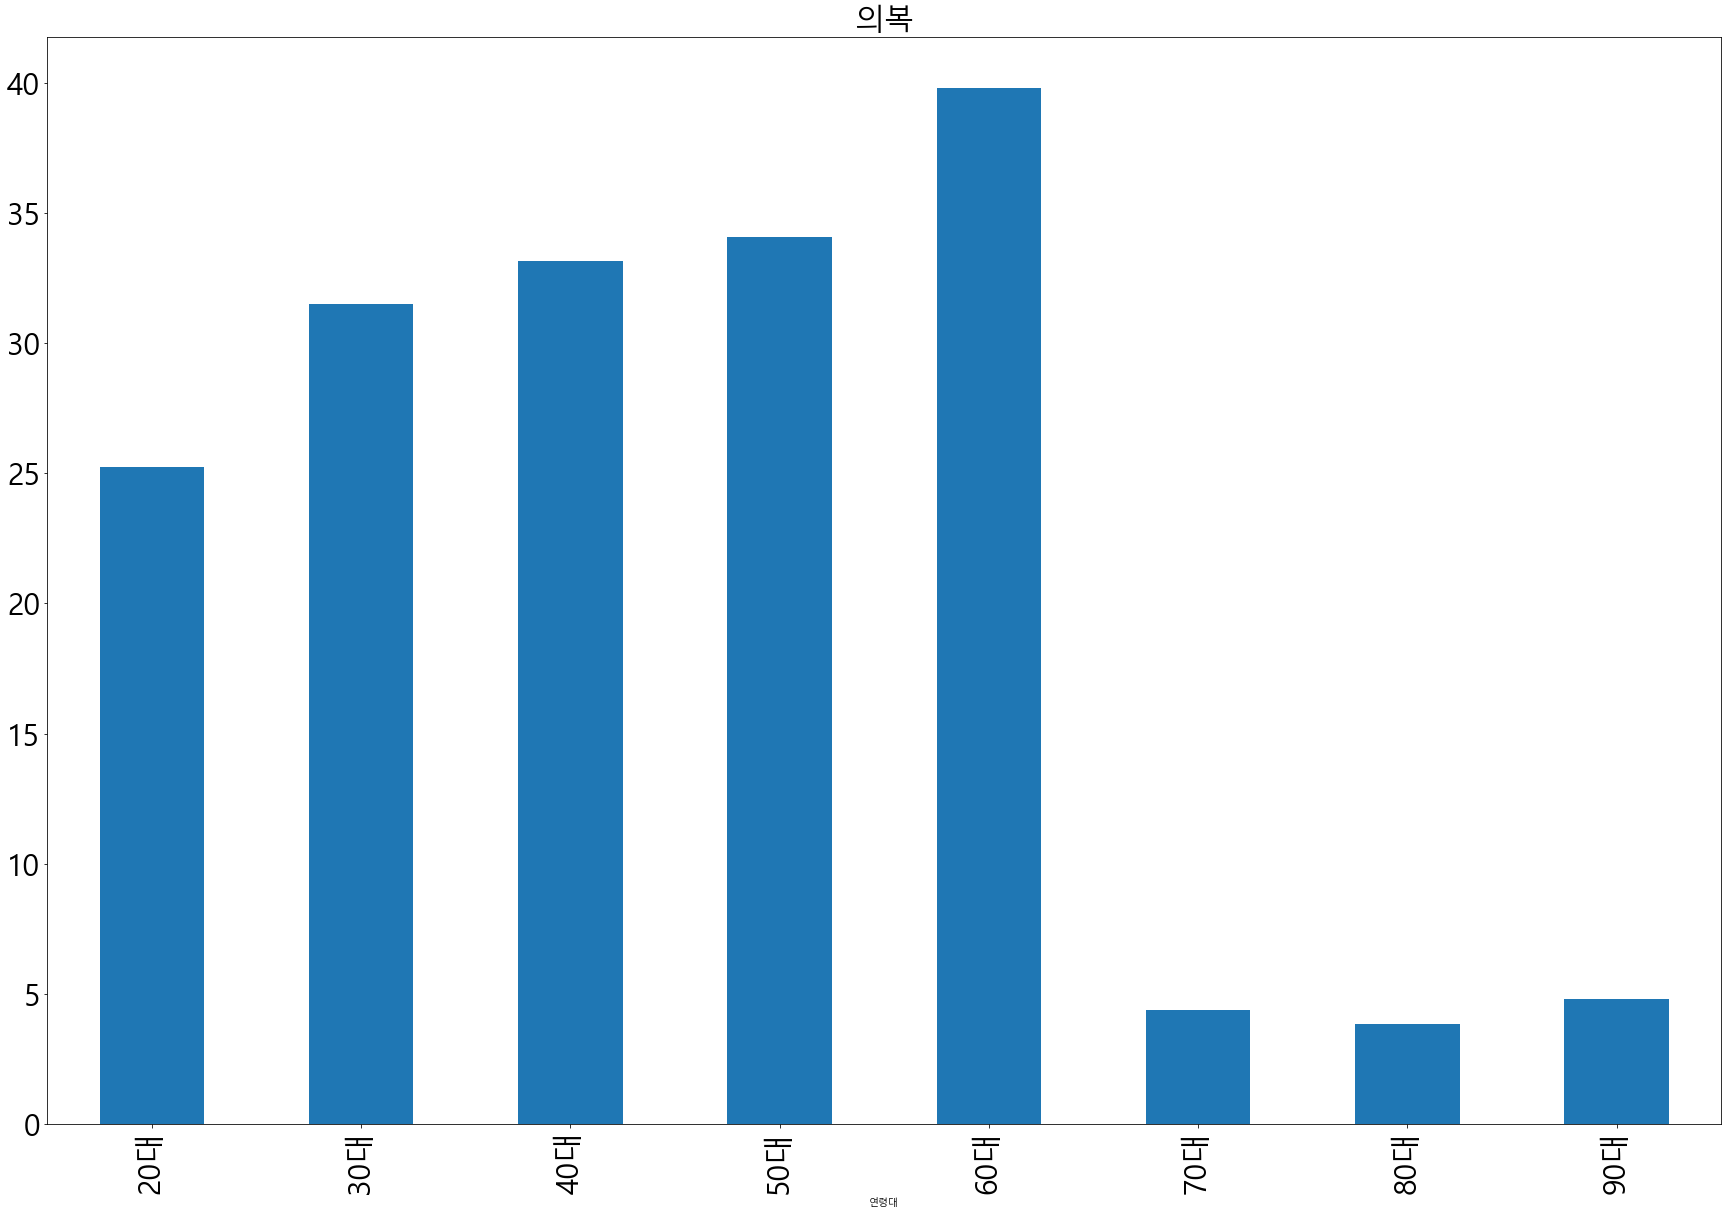

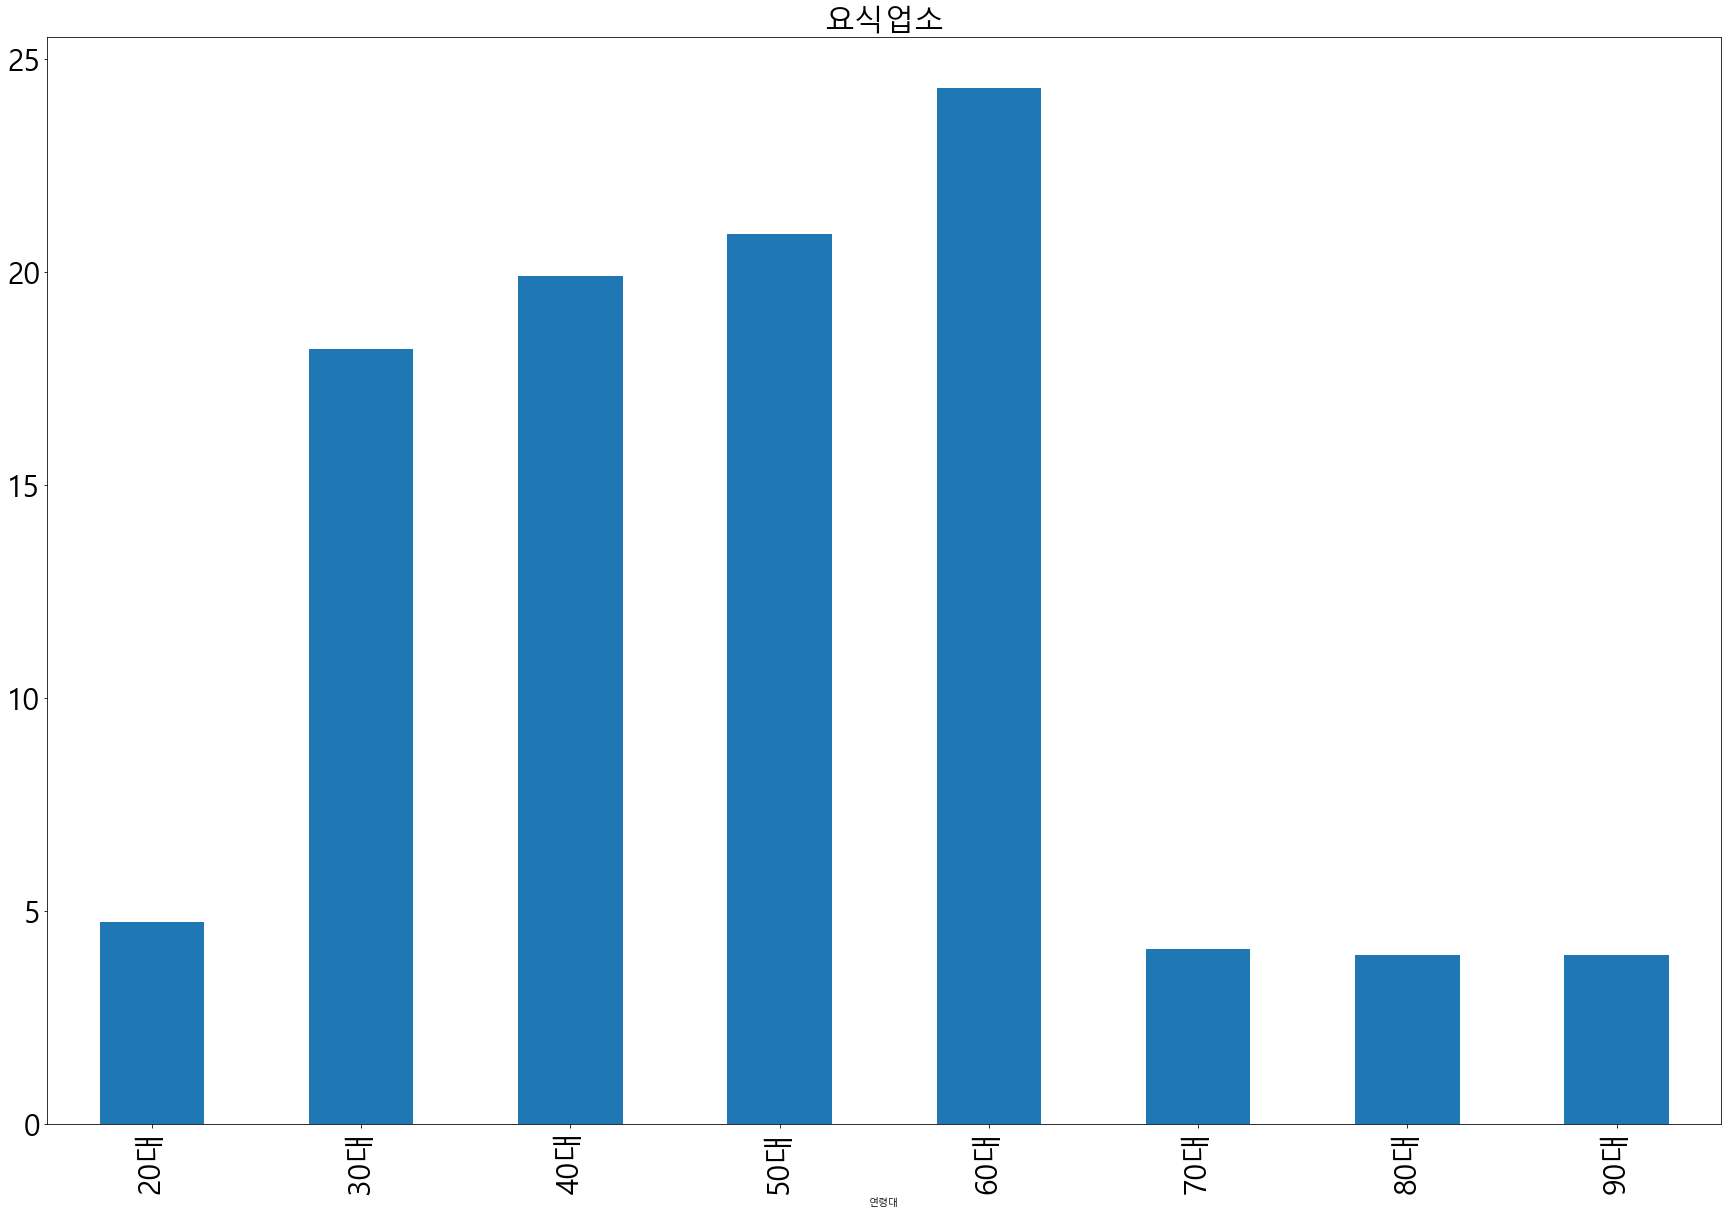

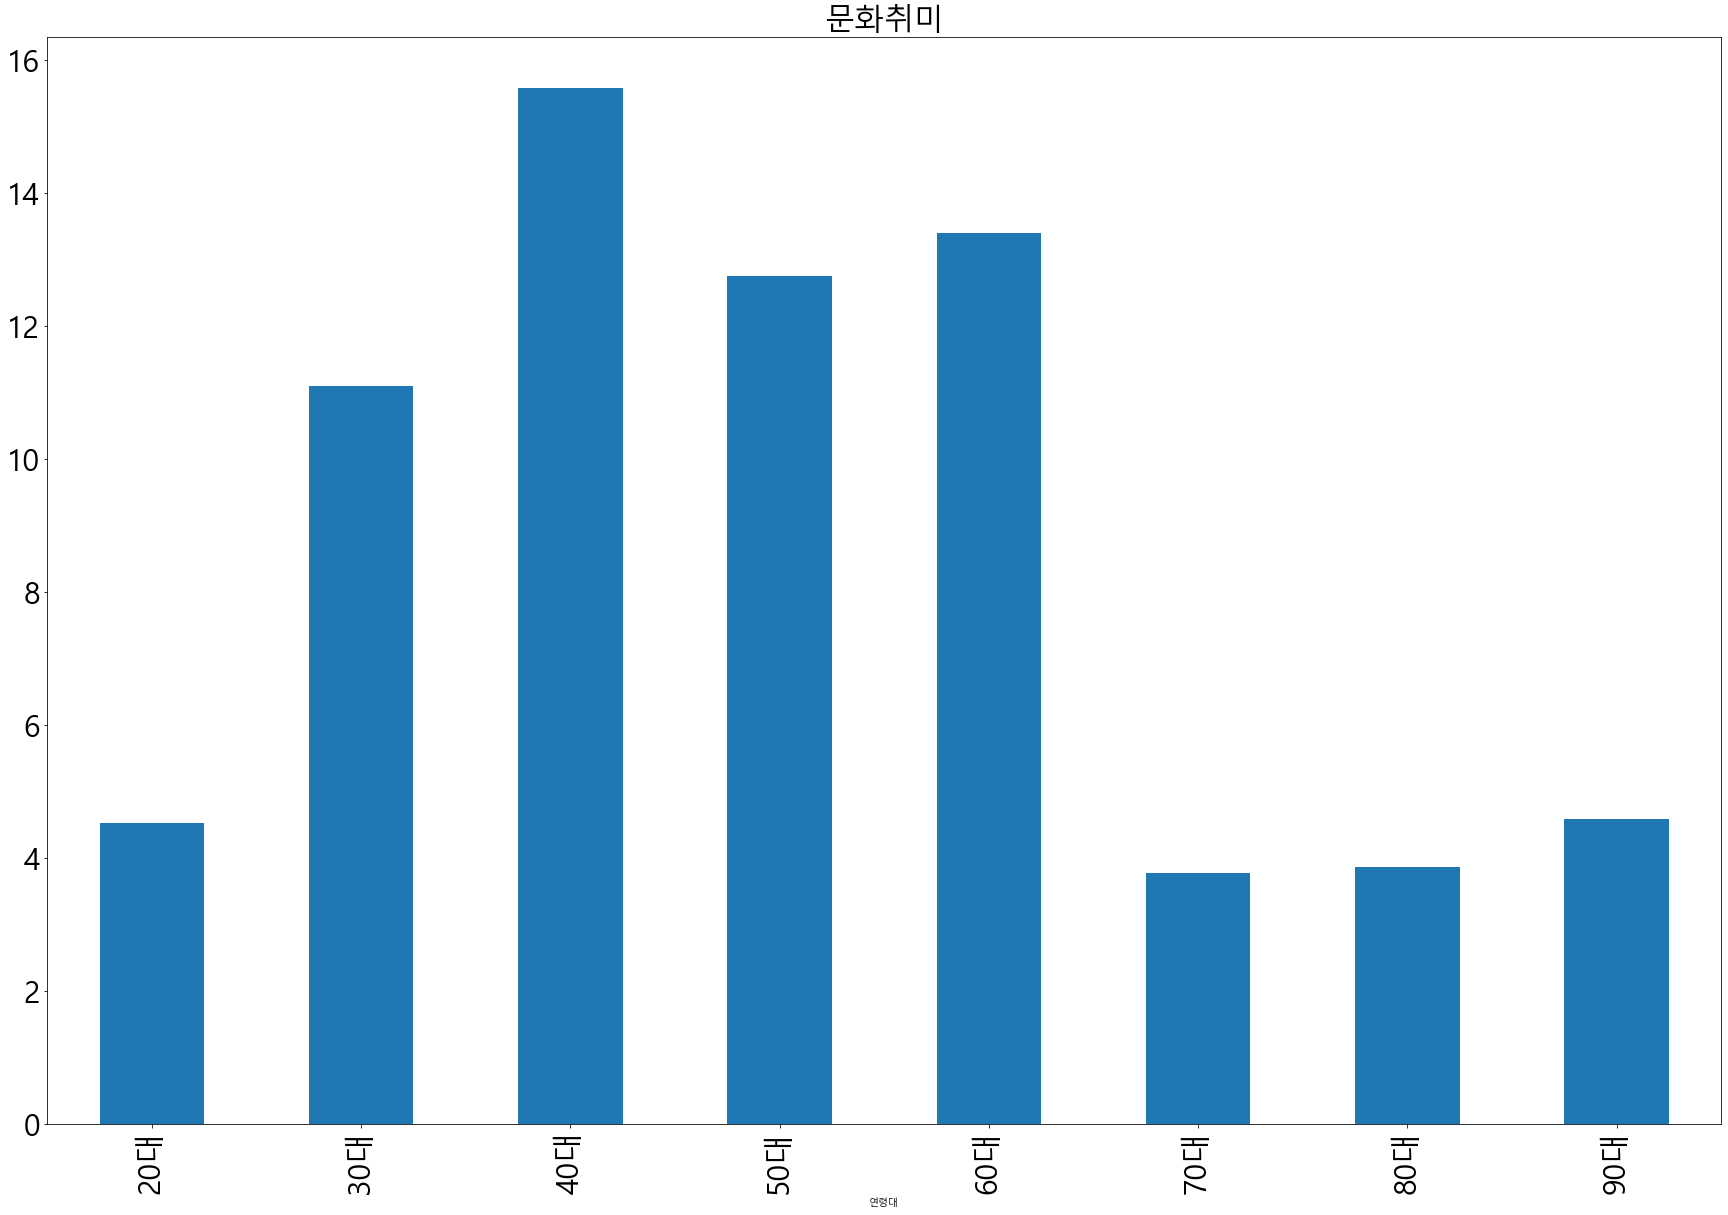

In [50]:
for i in list_:
    
    fig=plt.figure(figsize=(30, 20))
    age_purchase=credit_card1[credit_card1["소비처업종"]==i].groupby("연령대").sum()[["사용금액", "사용횟수"]]
    age_purchase["연령대별 1인 사용금액"]=age_purchase["사용금액"]/age_purchase["사용횟수"]
    age_purchase["연령대별 1인 사용금액"].plot.bar(fontsize=30)
    plt.title(i, fontsize=30)
    index+=1

,사용금액,사용횟수,연령대별 1인 사용금액
연령대,,,
20대,22624,4918,4.600244
30대,17907513,984680,18.186124
40대,19807771,995485,19.897609
50대,15677384,750298,20.894876
60대,8725366,359035,24.302271
70대,101738,24831,4.097217
80대,56485,14265,3.959692
90대,20801,5244,3.966629


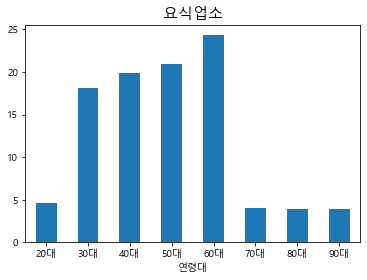

In [51]:
# 요식업소에서 연령대별 1인 사용금액(20대에서 초반은 제외)
upper_credit_card=credit_card1[credit_card1["연령"]>=23]
age_purchase=upper_credit_card[upper_credit_card["소비처업종"]=="요식업소"].groupby("연령대").sum()[["사용금액", "사용횟수"]]
age_purchase["연령대별 1인 사용금액"]=age_purchase["사용금액"]/age_purchase["사용횟수"]
age_purchase["연령대별 1인 사용금액"].plot.bar(rot=0)
plt.title("요식업소", fontsize=15)
age_purchase

In [52]:
import re
word=[]
for i in credit_card1["소비처"]:
    i=re.sub(r"\d+", '', str(i))
    word.append(i)

credit_card1["동네"]=word

In [53]:
credit_card1.head()

,Card_ID,분류,혜택분야,카드명,후불교통,가족카드,현금기능,IC기능,사용일자,지역,...,주소,소비처업종,성별,연령,사용횟수,사용금액,1회 사용금액,연령대,요일,동네
41749,87,신용카드,life,S카드 D-day,0,1,0,0,20180401,종로구,...,종로구 창신2동,의료기관,여성,22,10,193,19.0,20대,일,창신동
41750,87,신용카드,life,S카드 D-day,0,1,0,0,20180401,노원구,...,노원구 중계1동,보건위생,여성,82,39,112,3.0,80대,일,중계동
41751,87,신용카드,life,S카드 D-day,0,1,0,0,20180401,종로구,...,종로구 청운효자동,신변잡화,여성,30,4,705,176.0,30대,일,청운효자동
41752,87,신용카드,life,S카드 D-day,0,1,0,0,20180401,노원구,...,노원구 공릉1동,의료기관,남성,55,22,4463,203.0,50대,일,공릉동
41753,87,신용카드,life,S카드 D-day,0,1,0,0,20180402,노원구,...,노원구 중계1동,의료기관,남성,40,79,1306,17.0,40대,월,중계동


# 모델링

In [54]:
Card_spending.describe()

,사용일자,연령,사용횟수,사용금액,Card_ID,1회 사용금액
count,1.873030e+05,187303.000000,187303.000000,187303.000000,187303.000000,187303.000000
mean,2.018243e+07,45.280807,78.293236,1576.827563,140.597898,25.343865
std,3.535508e+03,16.042339,224.324233,6313.044374,72.349212,90.006715
min,2.018040e+07,20.000000,1.000000,2.000000,0.000000,-57.000000
25%,2.018062e+07,32.000000,9.000000,90.000000,94.000000,5.000000
50%,2.018091e+07,45.000000,24.000000,153.000000,158.000000,11.000000
75%,2.018121e+07,56.000000,53.000000,680.000000,206.000000,22.000000
max,2.019023e+07,105.000000,4995.000000,193694.000000,263.000000,3859.000000


- 이상치 처리

In [55]:
p1 = pd.pivot_table(data=Card_spending, index=['Card_ID'], columns='소비처업종', values='사용금액', aggfunc='sum').reset_index()
p1 = p1.fillna(0)
p2 = pd.pivot_table(data=Card_spending, index='Card_ID',values=['사용금액','사용횟수'],aggfunc='sum').reset_index()
p3 = pd.merge(p1,p2)
p4 = pd.merge(Card_data, p3)
df1 = pd.merge(Telemarketing, p4)
pd.options.display.max_columns =100

In [56]:
df1['연락일자(time)'] = pd.to_datetime(df1['연락일자'])
df1['연락일자(time)'].describe()

count                   39389
unique                    424
top       2018-03-10 00:00:00
freq                      169
first     2018-01-01 00:00:00
last      2019-02-28 00:00:00
Name: 연락일자(time), dtype: object

In [57]:
df1['연락월'] = df1['연락일자(time)'].dt.month

In [58]:
df1['Target'] = df1['계약여부'].replace({'no':0, 'yes':1})
df1['Target'].value_counts()

0    34847
1     4542
Name: Target, dtype: int64

In [59]:
df2 = df1.drop(columns=['신용카드소지여부', '연락일자','연락일자(time)', '연령대','계약여부','Card_ID','카드명', '분류', '직업군'])
df2.head(2)

,연령,결혼여부,학력,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,과거통화횟수,요일,경제활동,혜택분야,후불교통,가족카드,현금기능,IC기능,가구,가전,광학제품,레저업소,문화취미,보건위생,사무통신,서적문구,수리서비스,신변잡화,연료판매,요식업소,유통업,음료식품,의료기관,의복,자동차정비,자동차판매,전기,주방용품,직물,사용금액,사용횟수,연락월,Target
0,56,결혼,중졸,없음,없음,유선전화,261,1,0,수,비경제활동인구,life,0,1,0,0,0.0,8595.0,0.0,115.0,57.0,70418.0,0.0,123357.0,56.0,48936.0,7958.0,40889.0,334.0,115.0,1396520.0,286.0,115.0,0.0,0.0,261.0,24005.0,1722017,41525,1,0
1,56,결혼,미확인,대출있음,없음,유선전화,70,1,0,월,경제활동인구,life,0,1,0,0,0.0,8595.0,0.0,115.0,57.0,70418.0,0.0,123357.0,56.0,48936.0,7958.0,40889.0,334.0,115.0,1396520.0,286.0,115.0,0.0,0.0,261.0,24005.0,1722017,41525,2,0


**Modeling**

In [60]:
category_list = ['가구', '가전', '광학제품', '레저업소', '문화취미', '보건위생', '사무통신', '서적문구',
       '수리서비스', '신변잡화', '연료판매', '요식업소', '유통업', '음료식품', '의료기관', '의복', '자동차정비',
       '자동차판매', '전기', '주방용품', '직물', 'Target']

In [61]:
X = df2.drop(columns=category_list)
Y = df2['Target']

In [62]:
X

,연령,결혼여부,학력,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,과거통화횟수,요일,경제활동,혜택분야,후불교통,가족카드,현금기능,IC기능,사용금액,사용횟수,연락월
0,56,결혼,중졸,없음,없음,유선전화,261,1,0,수,비경제활동인구,life,0,1,0,0,1722017,41525,1
1,56,결혼,미확인,대출있음,없음,유선전화,70,1,0,월,경제활동인구,life,0,1,0,0,1722017,41525,2
2,53,결혼,고졸,없음,없음,유선전화,189,3,0,금,경제활동인구,life,0,1,0,0,1722017,41525,3
3,39,결혼,대졸학사,없음,없음,유선전화,496,3,0,목,경제활동인구,life,0,1,0,0,1722017,41525,4
4,35,이혼,대졸학사,미확인,미확인,유선전화,179,1,0,수,경제활동인구,life,0,1,0,0,1722017,41525,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39384,34,결혼,석박사,미확인,미확인,휴대폰,126,1,4,화,경제활동인구,finance,0,0,0,0,383486,12608,3
39385,82,이혼,중졸,대출있음,없음,휴대폰,143,2,1,화,비경제활동인구,finance,0,0,0,0,383486,12608,4
39386,61,결혼,중졸,없음,없음,유선전화,194,1,0,화,비경제활동인구,finance,0,0,0,0,383486,12608,4
39387,28,미혼,대졸학사,없음,없음,휴대폰,225,1,3,월,경제활동인구,finance,0,0,0,0,383486,12608,4


In [63]:
X = X.drop(['사용금액'], axis = 1)

In [64]:
X1 = pd.get_dummies(X)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.4, random_state =1234)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(23633, 49)
(15756, 49)
(23633,)
(15756,)


**DT**

In [268]:
model = Pipeline( [ ('scaler', RobustScaler()),
                   ('model', DecisionTreeClassifier() ) ] )
model.fit(X_train, Y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('model', DecisionTreeClassifier())])

In [269]:
param_list = {'model__criterion':['gini','entropy'],
             'model__max_depth':[2,3,4,5,6,7],
             'model__class_weight':[None, 'balanced'],
             'model__min_samples_leaf' : range(5, 10)}

In [227]:
grid_model = GridSearchCV(model, param_grid=param_list,
                          cv = 5, scoring='f1',n_jobs=-1)
grid_model.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7],
                         'model__min_samples_leaf': range(5, 10)},
             scoring='f1')

In [228]:
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=4,
                                        min_samples_leaf=5))])

In [229]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

In [230]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.91     20892
           1       0.40      0.68      0.50      2741

    accuracy                           0.84     23633
   macro avg       0.68      0.77      0.70     23633
weighted avg       0.89      0.84      0.86     23633



In [231]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     13955
           1       0.40      0.70      0.51      1801

    accuracy                           0.84     15756
   macro avg       0.68      0.78      0.71     15756
weighted avg       0.89      0.84      0.86     15756



**RF**

In [232]:
model = Pipeline( [ ('scaler', RobustScaler()),
                   ('model', RandomForestClassifier() ) ] )
model.fit(X_train, Y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('model', RandomForestClassifier())])

In [233]:
param_list = {'model__criterion' : ['gini', 'entropy'],
              'model__n_estimators':[50, 100, 200],
             'model__max_depth':[2,3,4,5,6,7],
             'model__class_weight':[None, 'balanced']}

In [234]:
grid_model = GridSearchCV(model, param_grid=param_list,
                          cv=5, scoring='f1',n_jobs=-1)
grid_model.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7],
                         'model__n_estimators': [50, 100, 200]},
             scoring='f1')

In [235]:
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=7,
                                        n_estimators=50))])

In [236]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

In [237]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89     20892
           1       0.38      0.81      0.52      2741

    accuracy                           0.82     23633
   macro avg       0.67      0.82      0.70     23633
weighted avg       0.90      0.82      0.85     23633



In [238]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     13955
           1       0.37      0.80      0.50      1801

    accuracy                           0.82     15756
   macro avg       0.67      0.81      0.69     15756
weighted avg       0.90      0.82      0.84     15756



**GB**

In [156]:
model = Pipeline( [ ('scaler', RobustScaler()),
                   ('model', GradientBoostingClassifier() ) ] )
model.fit(X_train, Y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('model', GradientBoostingClassifier())])

In [162]:
param_list = {'model__loss' : ['deviance', 'exponential'],
              'model__learning_rate' : [0.001, 0.01, 0.1],
              'model__n_estimators':[50, 100, 200],
             'model__criterion':['mse', 'mae'],
              'model__max_depth' : [3, 4, 5, 6, 7]}

In [163]:
grid_model.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['mse', 'mae'],
                         'model__learning_rate': [0.001, 0.01, 0.1],
                         'model__loss': ['deviance', 'exponential'],
                         'model__max_depth': [3, 4, 5, 6, 7],
                         'model__n_estimators': [50, 100, 200]},
             scoring='f1')>

In [164]:
grid_model = GridSearchCV(model, param_grid=param_list,
                          cv=3, scoring='f1',n_jobs=-1)
grid_model.fit(X_train,Y_train)

KeyboardInterrupt: 

> GB 모델 학습 시간이 너무 오래 걸려서 취소

In [ ]:
best_model = grid_model.best_estimator_
best_model

In [ ]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

In [ ]:
print(classification_report(Y_train, Y_train_pred))

In [ ]:
print(classification_report(Y_test, Y_test_pred))

**Catboosting**

In [122]:
#!pip install catboost

     |████████████████████████████████| 65.7 MB 178 kB/s  eta 0:00:01


In [104]:
from catboost import CatBoostClassifier

In [240]:
model = Pipeline( [ ('scaler', RobustScaler()),
                   ('model', CatBoostClassifier() ) ] )
model.fit(X_train, Y_train)

Learning rate set to 0.039758
0:	learn: 0.6466017	total: 20.9ms	remaining: 20.9s
1:	learn: 0.6101153	total: 41.3ms	remaining: 20.6s
2:	learn: 0.5768018	total: 50.4ms	remaining: 16.7s
3:	learn: 0.5442986	total: 64.6ms	remaining: 16.1s
4:	learn: 0.5150073	total: 72.8ms	remaining: 14.5s
5:	learn: 0.4874678	total: 80.9ms	remaining: 13.4s
6:	learn: 0.4648865	total: 91.5ms	remaining: 13s
7:	learn: 0.4442044	total: 99.5ms	remaining: 12.3s
8:	learn: 0.4265446	total: 113ms	remaining: 12.5s
9:	learn: 0.4107397	total: 125ms	remaining: 12.3s
10:	learn: 0.3981680	total: 133ms	remaining: 12s
11:	learn: 0.3846150	total: 148ms	remaining: 12.2s
12:	learn: 0.3749590	total: 161ms	remaining: 12.3s
13:	learn: 0.3649465	total: 171ms	remaining: 12s
14:	learn: 0.3569925	total: 179ms	remaining: 11.8s
15:	learn: 0.3477467	total: 201ms	remaining: 12.4s
16:	learn: 0.3394427	total: 220ms	remaining: 12.7s
17:	learn: 0.3319461	total: 239ms	remaining: 13.1s
18:	learn: 0.3268057	total: 259ms	remaining: 13.4s
19:	learn

171:	learn: 0.2330098	total: 2.27s	remaining: 10.9s
172:	learn: 0.2328829	total: 2.29s	remaining: 10.9s
173:	learn: 0.2327364	total: 2.31s	remaining: 10.9s
174:	learn: 0.2326394	total: 2.33s	remaining: 11s
175:	learn: 0.2325547	total: 2.33s	remaining: 10.9s
176:	learn: 0.2324527	total: 2.35s	remaining: 10.9s
177:	learn: 0.2323292	total: 2.36s	remaining: 10.9s
178:	learn: 0.2322409	total: 2.37s	remaining: 10.9s
179:	learn: 0.2321545	total: 2.38s	remaining: 10.8s
180:	learn: 0.2320652	total: 2.39s	remaining: 10.8s
181:	learn: 0.2319717	total: 2.4s	remaining: 10.8s
182:	learn: 0.2318917	total: 2.41s	remaining: 10.8s
183:	learn: 0.2318019	total: 2.42s	remaining: 10.7s
184:	learn: 0.2317310	total: 2.43s	remaining: 10.7s
185:	learn: 0.2316813	total: 2.45s	remaining: 10.7s
186:	learn: 0.2315619	total: 2.46s	remaining: 10.7s
187:	learn: 0.2314208	total: 2.48s	remaining: 10.7s
188:	learn: 0.2313476	total: 2.49s	remaining: 10.7s
189:	learn: 0.2312971	total: 2.5s	remaining: 10.7s
190:	learn: 0.23

346:	learn: 0.2183226	total: 4.53s	remaining: 8.53s
347:	learn: 0.2182853	total: 4.54s	remaining: 8.51s
348:	learn: 0.2181990	total: 4.56s	remaining: 8.51s
349:	learn: 0.2181730	total: 4.57s	remaining: 8.49s
350:	learn: 0.2181058	total: 4.58s	remaining: 8.48s
351:	learn: 0.2180918	total: 4.6s	remaining: 8.46s
352:	learn: 0.2180535	total: 4.61s	remaining: 8.45s
353:	learn: 0.2179717	total: 4.62s	remaining: 8.43s
354:	learn: 0.2178982	total: 4.63s	remaining: 8.42s
355:	learn: 0.2178074	total: 4.64s	remaining: 8.4s
356:	learn: 0.2177420	total: 4.65s	remaining: 8.38s
357:	learn: 0.2177058	total: 4.67s	remaining: 8.37s
358:	learn: 0.2176593	total: 4.68s	remaining: 8.35s
359:	learn: 0.2175924	total: 4.7s	remaining: 8.35s
360:	learn: 0.2175365	total: 4.71s	remaining: 8.33s
361:	learn: 0.2174641	total: 4.71s	remaining: 8.31s
362:	learn: 0.2173785	total: 4.72s	remaining: 8.29s
363:	learn: 0.2173241	total: 4.74s	remaining: 8.27s
364:	learn: 0.2172238	total: 4.75s	remaining: 8.26s
365:	learn: 0.2

510:	learn: 0.2066838	total: 6.63s	remaining: 6.35s
511:	learn: 0.2066176	total: 6.65s	remaining: 6.34s
512:	learn: 0.2065271	total: 6.66s	remaining: 6.32s
513:	learn: 0.2064288	total: 6.67s	remaining: 6.31s
514:	learn: 0.2063950	total: 6.68s	remaining: 6.29s
515:	learn: 0.2063010	total: 6.7s	remaining: 6.29s
516:	learn: 0.2062397	total: 6.71s	remaining: 6.27s
517:	learn: 0.2061743	total: 6.73s	remaining: 6.26s
518:	learn: 0.2060463	total: 6.74s	remaining: 6.25s
519:	learn: 0.2059887	total: 6.76s	remaining: 6.24s
520:	learn: 0.2059357	total: 6.77s	remaining: 6.22s
521:	learn: 0.2058917	total: 6.78s	remaining: 6.21s
522:	learn: 0.2057910	total: 6.8s	remaining: 6.2s
523:	learn: 0.2057160	total: 6.81s	remaining: 6.19s
524:	learn: 0.2056482	total: 6.82s	remaining: 6.17s
525:	learn: 0.2055813	total: 6.83s	remaining: 6.16s
526:	learn: 0.2054955	total: 6.86s	remaining: 6.15s
527:	learn: 0.2054148	total: 6.87s	remaining: 6.14s
528:	learn: 0.2053849	total: 6.88s	remaining: 6.13s
529:	learn: 0.2

680:	learn: 0.1961457	total: 8.92s	remaining: 4.18s
681:	learn: 0.1960776	total: 8.94s	remaining: 4.17s
682:	learn: 0.1960124	total: 8.95s	remaining: 4.15s
683:	learn: 0.1959673	total: 8.96s	remaining: 4.14s
684:	learn: 0.1958991	total: 8.97s	remaining: 4.13s
685:	learn: 0.1958682	total: 8.99s	remaining: 4.12s
686:	learn: 0.1957978	total: 9.01s	remaining: 4.1s
687:	learn: 0.1957655	total: 9.03s	remaining: 4.09s
688:	learn: 0.1957185	total: 9.05s	remaining: 4.08s
689:	learn: 0.1956544	total: 9.07s	remaining: 4.08s
690:	learn: 0.1955966	total: 9.09s	remaining: 4.07s
691:	learn: 0.1955488	total: 9.11s	remaining: 4.05s
692:	learn: 0.1954912	total: 9.13s	remaining: 4.04s
693:	learn: 0.1954559	total: 9.15s	remaining: 4.03s
694:	learn: 0.1953765	total: 9.17s	remaining: 4.02s
695:	learn: 0.1953321	total: 9.19s	remaining: 4.01s
696:	learn: 0.1952559	total: 9.21s	remaining: 4s
697:	learn: 0.1951942	total: 9.22s	remaining: 3.99s
698:	learn: 0.1951414	total: 9.23s	remaining: 3.98s
699:	learn: 0.19

850:	learn: 0.1865533	total: 11.2s	remaining: 1.96s
851:	learn: 0.1865056	total: 11.2s	remaining: 1.95s
852:	learn: 0.1864488	total: 11.2s	remaining: 1.94s
853:	learn: 0.1864058	total: 11.3s	remaining: 1.92s
854:	learn: 0.1863629	total: 11.3s	remaining: 1.91s
855:	learn: 0.1863302	total: 11.3s	remaining: 1.9s
856:	learn: 0.1862571	total: 11.3s	remaining: 1.89s
857:	learn: 0.1862167	total: 11.3s	remaining: 1.87s
858:	learn: 0.1861434	total: 11.3s	remaining: 1.86s
859:	learn: 0.1860892	total: 11.3s	remaining: 1.84s
860:	learn: 0.1860355	total: 11.3s	remaining: 1.83s
861:	learn: 0.1859823	total: 11.4s	remaining: 1.82s
862:	learn: 0.1859193	total: 11.4s	remaining: 1.8s
863:	learn: 0.1858369	total: 11.4s	remaining: 1.79s
864:	learn: 0.1857888	total: 11.4s	remaining: 1.78s
865:	learn: 0.1857555	total: 11.4s	remaining: 1.76s
866:	learn: 0.1857166	total: 11.4s	remaining: 1.75s
867:	learn: 0.1856654	total: 11.4s	remaining: 1.74s
868:	learn: 0.1855916	total: 11.4s	remaining: 1.73s
869:	learn: 0.

Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7fada185ef70>)])

In [241]:
param_list = {'model__iterations' : [700, 1000, 1500],
              'model__learning_rate' : [0.03, 0.05, 0.1],
              'model__bootstrap_type':['Bayesian', 'MVS'],
             'model__min_data_in_leaf':[2, 3, 4, 5, 6, 7],
              'model__auto_class_weights' : [None, 'Balanced']}

In [242]:
grid_model = GridSearchCV(model, param_grid=param_list,
                          cv=3, scoring='f1',n_jobs=-1)
grid_model.fit(X_train,Y_train)

0:	learn: 0.6811177	total: 19ms	remaining: 28.5s
1:	learn: 0.6690137	total: 29.6ms	remaining: 22.2s
2:	learn: 0.6578975	total: 40.8ms	remaining: 20.4s
3:	learn: 0.6476352	total: 49.2ms	remaining: 18.4s
4:	learn: 0.6377584	total: 61.9ms	remaining: 18.5s
5:	learn: 0.6269880	total: 70.6ms	remaining: 17.6s
6:	learn: 0.6179361	total: 79ms	remaining: 16.8s
7:	learn: 0.6098325	total: 86.9ms	remaining: 16.2s
8:	learn: 0.6015548	total: 95.8ms	remaining: 15.9s
9:	learn: 0.5939836	total: 106ms	remaining: 15.8s
10:	learn: 0.5861942	total: 119ms	remaining: 16.2s
11:	learn: 0.5799933	total: 129ms	remaining: 15.9s
12:	learn: 0.5738484	total: 144ms	remaining: 16.5s
13:	learn: 0.5675100	total: 161ms	remaining: 17.1s
14:	learn: 0.5635840	total: 168ms	remaining: 16.6s
15:	learn: 0.5579887	total: 182ms	remaining: 16.8s
16:	learn: 0.5531448	total: 190ms	remaining: 16.5s
17:	learn: 0.5483354	total: 200ms	remaining: 16.5s
18:	learn: 0.5432830	total: 216ms	remaining: 16.9s
19:	learn: 0.5386934	total: 232ms	re

167:	learn: 0.4200058	total: 2.1s	remaining: 16.7s
168:	learn: 0.4197793	total: 2.11s	remaining: 16.6s
169:	learn: 0.4195856	total: 2.13s	remaining: 16.7s
170:	learn: 0.4194260	total: 2.14s	remaining: 16.7s
171:	learn: 0.4192741	total: 2.16s	remaining: 16.7s
172:	learn: 0.4190400	total: 2.17s	remaining: 16.7s
173:	learn: 0.4189116	total: 2.18s	remaining: 16.6s
174:	learn: 0.4187551	total: 2.19s	remaining: 16.6s
175:	learn: 0.4185487	total: 2.2s	remaining: 16.6s
176:	learn: 0.4182533	total: 2.21s	remaining: 16.6s
177:	learn: 0.4181213	total: 2.23s	remaining: 16.5s
178:	learn: 0.4178912	total: 2.24s	remaining: 16.5s
179:	learn: 0.4177055	total: 2.25s	remaining: 16.5s
180:	learn: 0.4174429	total: 2.26s	remaining: 16.5s
181:	learn: 0.4172122	total: 2.27s	remaining: 16.4s
182:	learn: 0.4170499	total: 2.28s	remaining: 16.4s
183:	learn: 0.4169027	total: 2.29s	remaining: 16.4s
184:	learn: 0.4167393	total: 2.3s	remaining: 16.4s
185:	learn: 0.4165671	total: 2.32s	remaining: 16.4s
186:	learn: 0.4

338:	learn: 0.3947096	total: 4.18s	remaining: 14.3s
339:	learn: 0.3945678	total: 4.2s	remaining: 14.3s
340:	learn: 0.3944009	total: 4.21s	remaining: 14.3s
341:	learn: 0.3942890	total: 4.22s	remaining: 14.3s
342:	learn: 0.3941543	total: 4.23s	remaining: 14.3s
343:	learn: 0.3940241	total: 4.24s	remaining: 14.3s
344:	learn: 0.3938264	total: 4.25s	remaining: 14.2s
345:	learn: 0.3936697	total: 4.26s	remaining: 14.2s
346:	learn: 0.3934516	total: 4.28s	remaining: 14.2s
347:	learn: 0.3933110	total: 4.29s	remaining: 14.2s
348:	learn: 0.3931214	total: 4.31s	remaining: 14.2s
349:	learn: 0.3929931	total: 4.32s	remaining: 14.2s
350:	learn: 0.3928236	total: 4.33s	remaining: 14.2s
351:	learn: 0.3926737	total: 4.34s	remaining: 14.2s
352:	learn: 0.3925387	total: 4.36s	remaining: 14.2s
353:	learn: 0.3923850	total: 4.37s	remaining: 14.2s
354:	learn: 0.3922538	total: 4.39s	remaining: 14.2s
355:	learn: 0.3920777	total: 4.4s	remaining: 14.1s
356:	learn: 0.3920009	total: 4.41s	remaining: 14.1s
357:	learn: 0.

507:	learn: 0.3700197	total: 6.47s	remaining: 12.6s
508:	learn: 0.3697536	total: 6.48s	remaining: 12.6s
509:	learn: 0.3696165	total: 6.5s	remaining: 12.6s
510:	learn: 0.3694039	total: 6.52s	remaining: 12.6s
511:	learn: 0.3692953	total: 6.53s	remaining: 12.6s
512:	learn: 0.3691749	total: 6.55s	remaining: 12.6s
513:	learn: 0.3691043	total: 6.57s	remaining: 12.6s
514:	learn: 0.3690249	total: 6.58s	remaining: 12.6s
515:	learn: 0.3688816	total: 6.6s	remaining: 12.6s
516:	learn: 0.3687633	total: 6.62s	remaining: 12.6s
517:	learn: 0.3686322	total: 6.64s	remaining: 12.6s
518:	learn: 0.3684273	total: 6.66s	remaining: 12.6s
519:	learn: 0.3683070	total: 6.68s	remaining: 12.6s
520:	learn: 0.3681973	total: 6.7s	remaining: 12.6s
521:	learn: 0.3681041	total: 6.72s	remaining: 12.6s
522:	learn: 0.3680540	total: 6.73s	remaining: 12.6s
523:	learn: 0.3678902	total: 6.75s	remaining: 12.6s
524:	learn: 0.3677387	total: 6.76s	remaining: 12.6s
525:	learn: 0.3676099	total: 6.78s	remaining: 12.6s
526:	learn: 0.3

672:	learn: 0.3493442	total: 8.55s	remaining: 10.5s
673:	learn: 0.3492368	total: 8.56s	remaining: 10.5s
674:	learn: 0.3491353	total: 8.57s	remaining: 10.5s
675:	learn: 0.3490259	total: 8.58s	remaining: 10.5s
676:	learn: 0.3489640	total: 8.59s	remaining: 10.4s
677:	learn: 0.3488822	total: 8.61s	remaining: 10.4s
678:	learn: 0.3487544	total: 8.62s	remaining: 10.4s
679:	learn: 0.3486277	total: 8.64s	remaining: 10.4s
680:	learn: 0.3485949	total: 8.66s	remaining: 10.4s
681:	learn: 0.3484266	total: 8.67s	remaining: 10.4s
682:	learn: 0.3482992	total: 8.69s	remaining: 10.4s
683:	learn: 0.3482012	total: 8.7s	remaining: 10.4s
684:	learn: 0.3481025	total: 8.71s	remaining: 10.4s
685:	learn: 0.3479982	total: 8.72s	remaining: 10.4s
686:	learn: 0.3479187	total: 8.73s	remaining: 10.3s
687:	learn: 0.3477532	total: 8.75s	remaining: 10.3s
688:	learn: 0.3476422	total: 8.77s	remaining: 10.3s
689:	learn: 0.3475566	total: 8.78s	remaining: 10.3s
690:	learn: 0.3473931	total: 8.8s	remaining: 10.3s
691:	learn: 0.

835:	learn: 0.3316716	total: 10.6s	remaining: 8.43s
836:	learn: 0.3315941	total: 10.6s	remaining: 8.42s
837:	learn: 0.3314544	total: 10.6s	remaining: 8.41s
838:	learn: 0.3313516	total: 10.7s	remaining: 8.39s
839:	learn: 0.3312608	total: 10.7s	remaining: 8.38s
840:	learn: 0.3311126	total: 10.7s	remaining: 8.37s
841:	learn: 0.3309775	total: 10.7s	remaining: 8.36s
842:	learn: 0.3309162	total: 10.7s	remaining: 8.34s
843:	learn: 0.3308333	total: 10.7s	remaining: 8.32s
844:	learn: 0.3307410	total: 10.7s	remaining: 8.31s
845:	learn: 0.3306660	total: 10.7s	remaining: 8.3s
846:	learn: 0.3305666	total: 10.7s	remaining: 8.29s
847:	learn: 0.3304650	total: 10.8s	remaining: 8.27s
848:	learn: 0.3303531	total: 10.8s	remaining: 8.26s
849:	learn: 0.3302545	total: 10.8s	remaining: 8.24s
850:	learn: 0.3301740	total: 10.8s	remaining: 8.23s
851:	learn: 0.3300880	total: 10.8s	remaining: 8.21s
852:	learn: 0.3298887	total: 10.8s	remaining: 8.2s
853:	learn: 0.3297941	total: 10.8s	remaining: 8.19s
854:	learn: 0.

999:	learn: 0.3153340	total: 12.6s	remaining: 6.32s
1000:	learn: 0.3152627	total: 12.7s	remaining: 6.31s
1001:	learn: 0.3152325	total: 12.7s	remaining: 6.3s
1002:	learn: 0.3151117	total: 12.7s	remaining: 6.28s
1003:	learn: 0.3150431	total: 12.7s	remaining: 6.27s
1004:	learn: 0.3149005	total: 12.7s	remaining: 6.26s
1005:	learn: 0.3148580	total: 12.7s	remaining: 6.24s
1006:	learn: 0.3147433	total: 12.7s	remaining: 6.24s
1007:	learn: 0.3146729	total: 12.7s	remaining: 6.22s
1008:	learn: 0.3146081	total: 12.8s	remaining: 6.21s
1009:	learn: 0.3144973	total: 12.8s	remaining: 6.19s
1010:	learn: 0.3144243	total: 12.8s	remaining: 6.18s
1011:	learn: 0.3143156	total: 12.8s	remaining: 6.17s
1012:	learn: 0.3142132	total: 12.8s	remaining: 6.16s
1013:	learn: 0.3141482	total: 12.8s	remaining: 6.14s
1014:	learn: 0.3140073	total: 12.8s	remaining: 6.13s
1015:	learn: 0.3139116	total: 12.8s	remaining: 6.12s
1016:	learn: 0.3138070	total: 12.9s	remaining: 6.1s
1017:	learn: 0.3137032	total: 12.9s	remaining: 6.

1165:	learn: 0.3004347	total: 14.7s	remaining: 4.21s
1166:	learn: 0.3003255	total: 14.7s	remaining: 4.2s
1167:	learn: 0.3002315	total: 14.7s	remaining: 4.19s
1168:	learn: 0.3001603	total: 14.7s	remaining: 4.17s
1169:	learn: 0.3000968	total: 14.8s	remaining: 4.16s
1170:	learn: 0.2999730	total: 14.8s	remaining: 4.15s
1171:	learn: 0.2998718	total: 14.8s	remaining: 4.14s
1172:	learn: 0.2997998	total: 14.8s	remaining: 4.12s
1173:	learn: 0.2996993	total: 14.8s	remaining: 4.11s
1174:	learn: 0.2996220	total: 14.8s	remaining: 4.1s
1175:	learn: 0.2995555	total: 14.8s	remaining: 4.08s
1176:	learn: 0.2994805	total: 14.8s	remaining: 4.07s
1177:	learn: 0.2993947	total: 14.9s	remaining: 4.06s
1178:	learn: 0.2993058	total: 14.9s	remaining: 4.05s
1179:	learn: 0.2992204	total: 14.9s	remaining: 4.04s
1180:	learn: 0.2991620	total: 14.9s	remaining: 4.02s
1181:	learn: 0.2991021	total: 14.9s	remaining: 4.01s
1182:	learn: 0.2989751	total: 14.9s	remaining: 4s
1183:	learn: 0.2988988	total: 14.9s	remaining: 3.99

1329:	learn: 0.2866031	total: 16.8s	remaining: 2.15s
1330:	learn: 0.2865194	total: 16.8s	remaining: 2.13s
1331:	learn: 0.2864262	total: 16.8s	remaining: 2.12s
1332:	learn: 0.2863494	total: 16.8s	remaining: 2.11s
1333:	learn: 0.2862755	total: 16.8s	remaining: 2.1s
1334:	learn: 0.2862359	total: 16.9s	remaining: 2.08s
1335:	learn: 0.2861543	total: 16.9s	remaining: 2.07s
1336:	learn: 0.2860457	total: 16.9s	remaining: 2.06s
1337:	learn: 0.2859724	total: 16.9s	remaining: 2.04s
1338:	learn: 0.2859215	total: 16.9s	remaining: 2.03s
1339:	learn: 0.2858817	total: 16.9s	remaining: 2.02s
1340:	learn: 0.2857927	total: 16.9s	remaining: 2.01s
1341:	learn: 0.2857176	total: 16.9s	remaining: 1.99s
1342:	learn: 0.2856053	total: 17s	remaining: 1.98s
1343:	learn: 0.2855147	total: 17s	remaining: 1.97s
1344:	learn: 0.2854187	total: 17s	remaining: 1.96s
1345:	learn: 0.2853182	total: 17s	remaining: 1.94s
1346:	learn: 0.2852347	total: 17s	remaining: 1.93s
1347:	learn: 0.2851710	total: 17s	remaining: 1.92s
1348:	

1495:	learn: 0.2740935	total: 18.8s	remaining: 50.4ms
1496:	learn: 0.2740017	total: 18.8s	remaining: 37.8ms
1497:	learn: 0.2739196	total: 18.9s	remaining: 25.2ms
1498:	learn: 0.2738898	total: 18.9s	remaining: 12.6ms
1499:	learn: 0.2738321	total: 18.9s	remaining: 0us


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model',
                                        <catboost.core.CatBoostClassifier object at 0x7fada185ef70>)]),
             n_jobs=-1,
             param_grid={'model__auto_class_weights': [None, 'Balanced'],
                         'model__bootstrap_type': ['Bayesian', 'MVS'],
                         'model__iterations': [700, 1000, 1500],
                         'model__learning_rate': [0.03, 0.05, 0.1],
                         'model__min_data_in_leaf': [2, 3, 4, 5, 6, 7]},
             scoring='f1')

In [243]:
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7fada164dd90>)])

In [244]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

In [245]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     20892
           1       0.49      0.94      0.64      2741

    accuracy                           0.88     23633
   macro avg       0.74      0.90      0.79     23633
weighted avg       0.93      0.88      0.89     23633



In [246]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90     13955
           1       0.39      0.75      0.52      1801

    accuracy                           0.84     15756
   macro avg       0.68      0.80      0.71     15756
weighted avg       0.90      0.84      0.86     15756



**XB**

In [140]:
# !pip install xgboost

     |████████████████████████████████| 157.5 MB 107 kB/s eta 0:00:013 |█                               | 4.6 MB 5.9 MB/s eta 0:00:26


In [142]:
from xgboost import XGBClassifier

In [143]:
model = Pipeline( [ ('scaler', RobustScaler()),
                   ('model', XGBClassifier() ) ] )
model.fit(X_train, Y_train)

[15:17:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [135]:
param_list = {'model__loss' : ['deviance', 'exponential'],
              'model__learning_rate' : [0.001, 0.01, 0.1],
              'model__n_estimators':[50, 100, 200],
             'model__criterion':['criedman_mse', 'mse', 'mae'],
              'model__max_depth' : [3, 4, 5, 6, 7]}

In [136]:
grid_model.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model',
                                        <catboost.core.CatBoostClassifier object at 0x7fad7c1c9850>)]),
             n_jobs=-1,
             param_grid={'model__auto_class_weights': [None, 'Balanced'],
                         'model__bootstrap_type': ['Bayesian', 'MVS'],
                         'model__iterations': [700, 1000, 1500],
                         'model__learning_rate': [0.03, 0.05, 0.1],
                         'model__min_data_in_leaf': [2, 3, 4, 5, 6, 7]},
             scoring='f1')>

In [ ]:
grid_model = GridSearchCV(model, param_grid=param_list,
                          cv=3, scoring='f1',n_jobs=-1)
grid_model.fit(X_train,Y_train)

In [ ]:
best_model = grid_model.best_estimator_
best_model

In [ ]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

In [ ]:
print(classification_report(Y_train, Y_train_pred))

In [255]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90     13955
           1       0.39      0.75      0.52      1801

    accuracy                           0.84     15756
   macro avg       0.68      0.80      0.71     15756
weighted avg       0.90      0.84      0.86     15756



## 모델 비교

In [67]:
#모델링 결과 가져오기
import pickle

In [68]:
# train_test_split(test_size=test 데이터 베율, random_state: random seed)
df_train, df_test=train_test_split(df2, test_size=0.4, random_state=1234)

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (23633, 41)
test data size : (15756, 41)


In [69]:
# 분석 모델
model=["LogisticRegression", "DecisionTree", "RandomForest", "CatBoosting", "XgBoosting"]


# auc score 저장
model_auc=[]
# 정확도 저장
train_accuracy=[]; test_accuracy=[]
# f1 score 저장
model_f1_score=[]
# 재현율 저장
model_recall_score=[]

Optimization terminated successfully.
         Current function value: 0.259069
         Iterations 7


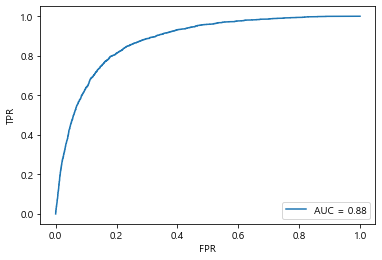

In [70]:
# 모델 생성
log_model=pickle.load(open('./model/210319_log_model.sav', 'rb'))

# 적합
log_result=log_model.fit()

# train/test 데이터 예측
y_pred_train =log_result.predict(df_train)
y_pred_test=log_result.predict(df_test)

# 0과 1의 값을 가진 class로 변환
y_pred_train_class=(y_pred_train>0.5).astype(int)
y_pred_test_class=(y_pred_test>0.5).astype(int)

# train 정확도
train_accuracy.append(accuracy_score(df_train["Target"], y_pred_train_class))
# test 정확도
test_accuracy.append(accuracy_score(df_test["Target"], y_pred_test_class))

# roc_curve(실제값, 예측값), fpr=FP/(FP+TN): 거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성 비율(재현율)
fpr, tpr, thresholds=roc_curve(df_test["Target"], y_pred_test)
roc_auc=auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label="AUC = %0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [71]:
# f1 스코어
model_f1_score.append(f1_score(Y_test, y_pred_test_class, average='macro'))
model_recall_score.append(recall_score(Y_test, y_pred_test_class, average='macro'))

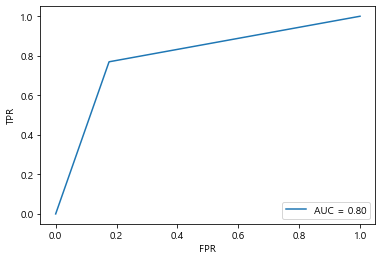

In [72]:
# 모델 생성
dt_model=pickle.load(open('./model/210319_DT_model.sav', 'rb'))

# train 정확도
train_accuracy.append(dt_model.score(X_train, Y_train))
# test 정확도
test_accuracy.append(dt_model.score(X_test, Y_test))

# 예측값
y_pred=dt_model.predict(X_test)

# roc_curve(실제값, 예측값), fpr=FP/(FP+TN): 거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성 비율(재현율)
fpr, tpr, thresholds=roc_curve(Y_test, y_pred)
roc_auc=auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label="AUC = %0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [73]:
# f1 스코어
model_f1_score.append(f1_score(Y_test, y_pred, average='macro'))
model_recall_score.append(recall_score(Y_test, y_pred, average='macro'))

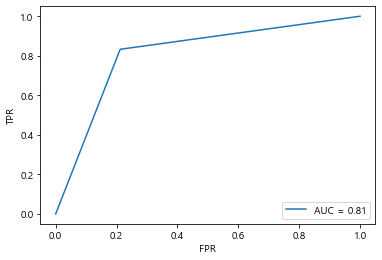

In [74]:
# 모델 생성
rf_model=pickle.load(open('./model/210319_RF_model.sav', 'rb'))

# train 정확도
train_accuracy.append(rf_model.score(X_train, Y_train))
# test 정확도
test_accuracy.append(rf_model.score(X_test, Y_test))

# 예측값
y_pred=rf_model.predict(X_test)

# roc_curve(실제값, 예측값), fpr=FP/(FP+TN): 거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성 비율(재현율)
fpr, tpr, thresholds=roc_curve(Y_test, y_pred)
roc_auc=auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label="AUC = %0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [75]:
# f1 스코어
model_f1_score.append(f1_score(Y_test, y_pred, average='macro'))
model_recall_score.append(recall_score(Y_test, y_pred, average='macro'))

- GB 모델은 학습 시간이 너무 오래걸려서 제외

In [76]:
# # 모델 생성
# gb_model=pickle.load(open('./model/210319_GB_model.sav', 'rb'))

# # train 정확도
# train_accuracy.append(gb_model.score(X_train, Y_train))
# # test 정확도
# test_accuracy.append(gb_model.score(X_test, Y_test))

# # 예측값
# y_pred=gb_model.predict(X_test)

# # roc_curve(실제값, 예측값), fpr=FP/(FP+TN): 거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성 비율(재현율)
# fpr, tpr, thresholds=roc_curve(Y_test, y_pred)
# roc_auc=auc(fpr, tpr)

# # auc 저장
# model_auc.append(roc_auc)

# # roc curve 그리기, label에 auc 표시(소수점 2자리)
# plt.plot(fpr, tpr, label="AUC = %0.2f"%roc_auc)
# plt.legend(loc="lower right")
# plt.ylabel("TPR");plt.xlabel("FPR")
# plt.show()

In [77]:
# # f1 스코어
# model_f1_score.append(f1_score(Y_test, y_pred))
# model_recall_score.append(recall_score(Y_test, y_pred))

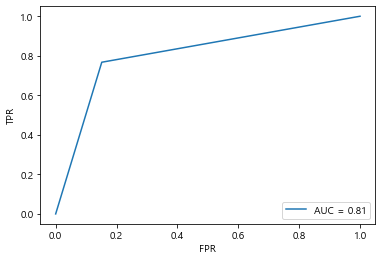

In [78]:
# 모델 생성
cat_model=pickle.load(open('./model/210319_CAT_model.sav', 'rb'))

# train 정확도
train_accuracy.append(cat_model.score(X_train, Y_train))
# test 정확도
test_accuracy.append(cat_model.score(X_test, Y_test))

# 예측값
y_pred=cat_model.predict(X_test)

# roc_curve(실제값, 예측값), fpr=FP/(FP+TN): 거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성 비율(재현율)
fpr, tpr, thresholds=roc_curve(Y_test, y_pred)
roc_auc=auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label="AUC = %0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [79]:
# f1 스코어
model_f1_score.append(f1_score(Y_test, y_pred, average='macro'))
model_recall_score.append(recall_score(Y_test, y_pred, average='macro'))

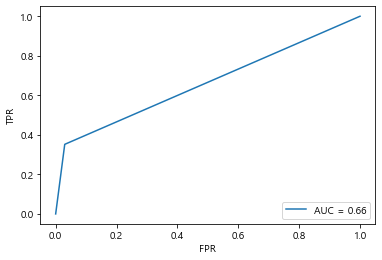

In [80]:
# 모델 생성
xg_model=pickle.load(open('./model/210319_xg_model.sav', 'rb'))

# train 정확도
train_accuracy.append(xg_model.score(X_train, Y_train))
# test 정확도
test_accuracy.append(xg_model.score(X_test, Y_test))

# 예측값
y_pred=xg_model.predict(X_test)

# roc_curve(실제값, 예측값), fpr=FP/(FP+TN): 거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성 비율(재현율)
fpr, tpr, thresholds=roc_curve(Y_test, y_pred)
roc_auc=auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label="AUC = %0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [81]:
# f1 스코어
model_f1_score.append(f1_score(Y_test, y_pred, average='macro'))
model_recall_score.append(recall_score(Y_test, y_pred, average='macro'))

- 모델별 정확도 표, bar plot 생성

In [82]:
# 모델별 정확도 표
df_eval=pd.DataFrame(index=model)
df_eval["TrainAccuracy"]=train_accuracy
df_eval["TestAccuracy"]=test_accuracy
df_eval["F1Score"]=model_f1_score
df_eval["Recall"]=model_recall_score
df_eval["AUC"]=model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,Recall,AUC
LogisticRegression,0.895,0.897,0.663,0.627,0.880
DecisionTree,0.821,0.818,0.691,0.797,0.797
RandomForest,0.799,0.793,0.675,0.810,0.810
CatBoosting,0.880,0.839,0.713,0.808,0.808
XgBoosting,0.916,0.900,0.695,0.661,0.661


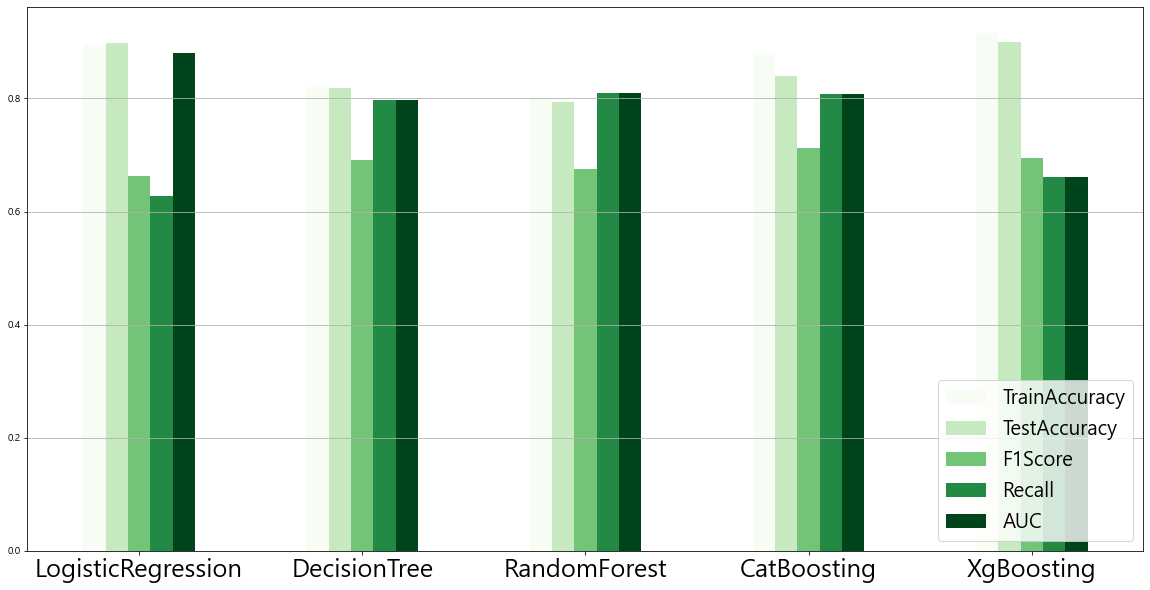

In [83]:
# 정확도 bar plot 생성
df_eval.plot.bar(rot=0, figsize=(20, 10), cmap = 'Greens')
plt.legend(loc="lower right", fontsize=20)
plt.xticks(fontsize=25)
plt.grid(axis="y")

## 최종 모델 평가

In [84]:
CAT_model = pickle.load(open('./model/210319_CAT_model.sav', 'rb'))

In [85]:
col=[]
for i in range(len([X_test.loc[3646].values][0])):
    col.append(i)

In [86]:
df_input = pd.DataFrame([X_test.loc[3646].values], columns=col)

In [87]:
# 결과 출력 : 계약 성공이면 1, 실패면 0
y_CAT_pred = CAT_model.predict(df_input)
y_CAT_pred

array([1], dtype=int64)

In [88]:
# 성공 확률
CAT_model.predict_proba(df_input)[0][1]*100

75.10654389618465

In [89]:
# 결론 도출
# 변수명 저장
v_feature_names=X_train.columns

# gb.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_names
df_importance["Importance"] = CAT_model['model'].feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
1,통화시간,24.453
0,연령,9.651
9,연락월,9.451
8,사용횟수,7.077
2,연락시도횟수,6.409
3,과거통화횟수,4.421
28,contact_유선전화,3.654
29,contact_휴대폰,3.027
16,학력_대졸학사,2.404
15,학력_고졸,1.323


Text(0, 0.5, '변수')

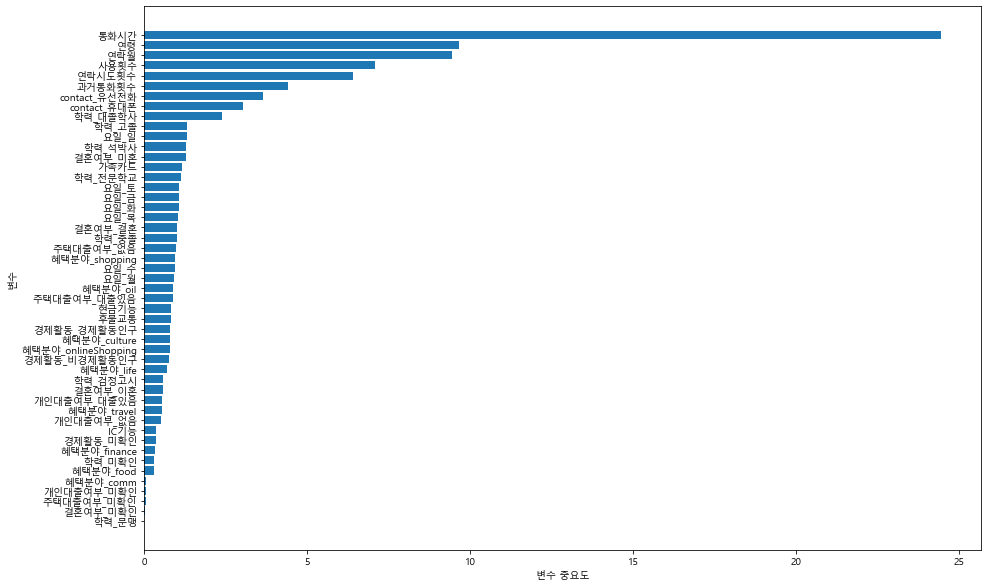

In [90]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.figure(figsize=(15, 10))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")